In [1]:
import numpy as np
print('numpy version\t:',np.__version__)

import pandas as pd
print('pandas version\t:',pd.__version__)


import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import re

import seaborn as sns
print('seaborn version\t:',sns.__version__)

#set it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

#set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:,.2f}'.format 

# To display all the columns
pd.set_option('display.max_columns', 130)

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os
# if there are any warning due to version mismatch, it will be ignored
import warnings
warnings.filterwarnings('ignore') 

import platform
print('Python version\t:',platform.python_version())

numpy version	: 1.23.5
pandas version	: 2.1.4
seaborn version	: 0.13.2
Python version	: 3.10.13


# Data Understanding

In [2]:
#Reading Loan dataset Metadata
loan_description = pd.read_excel('Data_Dictionary.xlsx').dropna()
loan_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [3]:
# Loading the dataset
loan = pd.read_csv('loan.zip')

Text(0, 0.5, 'Data type')

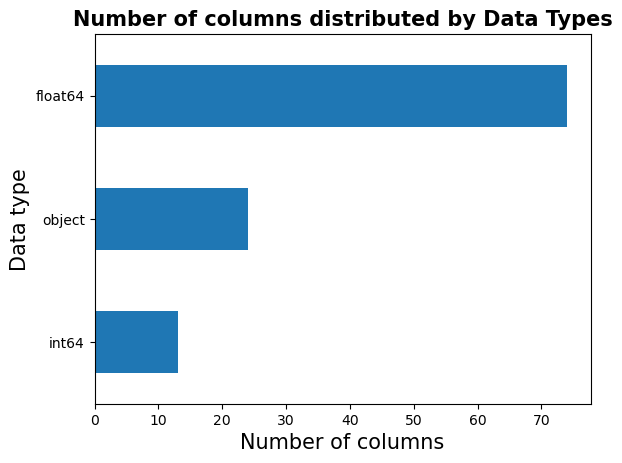

In [4]:
# Number of each type of column
loan.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=15,weight='bold')
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [5]:
#Checking the shape of the dataframe
print("Shape of the Initial Loan Dataset is : ",loan.shape)

Shape of the Initial Loan Dataset is :  (39717, 111)


## Data Summarization

In [6]:
#Check overall statistics of Loan dataframe
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,661.00",0.00,"39,717.00",0.00,0.00,0.00,"39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,661.00","39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,

In [7]:
#Check the Loan Dataframe Columns types and other Informations
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
#Lets have a look at original dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Cleaning and Manipulation

## Data Cleaning
#### - Remove the columns which have higher percentage of missing values

In [9]:
#List missing value percentage of each column in loan dataframe
missing_values_columns = round(100*(loan.isnull().sum()/loan.shape[0]), 2)
missing_values_columns.loc[missing_values_columns > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.59
title                          0.03
mths_since_last_delinq        64.66
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 68, dtype: float64

#### * There are many columns where missing value percentage is more than 90%, lets remove those columns as these columns doesn't give any information in analysis

### Treating Missing Values columns   

In [10]:
# creating the dataframe with columns having more than 90% missing values
missing_values_columns = loan.columns[100*(loan.isnull().sum()/loan.shape[0]) > 90]

missing_values_columns.shape

(56,)

In [11]:
# Removing the columns having more than 90% missing values

loan = loan.drop(missing_values_columns, axis=1)
loan.shape

(39717, 55)

In [12]:
# Percentage of missing values in each column after dropping more than 90% missing values

missing_values_columns = round(100*(loan.isnull().sum()/loan.shape[0]), 2)

missing_values_columns[missing_values_columns != 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.59
title                         0.03
mths_since_last_delinq       64.66
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

##### * Still there are columns like desc, mnths_since_last_delinq with ~33% and ~65% missing values respectively. Lets check whether they are relevant for any useful information

In [13]:
# Check for values of columns 'desc' and 'mths_since_last_delinq'

loan.loc[:,['desc','mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.00
4,Borrower added on 12/21/11 > I plan on combi...,38.00


##### The column 'desc' contains the loan description the applicants provide while applying for the loan. This doesn't seem to be much useful in inferring our target variable, hence we will not use this column in this analysis.

Second col months since last delinquent represents the number of months passed since the person last fell into the delinquency group. This value will get generated months after the loan has been approved, and is not present at the time of loan application, hence it cannot be used as a predictor of default at the time of loan approval.

Thus let's drop the two columns.

In [14]:
# Remove the columns 'desc' and 'mths_since_last_delinq'

loan.drop(['desc','mths_since_last_delinq'], axis = 1, inplace = True)

In [15]:
# Percentage of missing values after dropping columns

missing_values_columns = round(100*(loan.isnull().sum()/loan.shape[0]), 2)

missing_values_columns[missing_values_columns != 0]

emp_title                    6.19
emp_length                   2.71
title                        0.03
revol_util                   0.13
last_pymnt_d                 0.18
last_credit_pull_d           0.01
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64

In [16]:
# finding missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [17]:
# finding rows which have more than 5 missing values (around 10% of total column)
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

### Since there aren't any rows with more than 5 missing values (10% of total columns), so not dropping any rows

In [18]:
#Check the Loan Dataframe columns types and other information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [145]:
loan['pub_rec'].value_counts()

pub_rec
0    34632
1     1965
2       46
3        6
4        2
Name: count, dtype: int64

### **Assumptions**

1 The variables like recoveries, total_pymnt, total_pymnt_inv, total_rec_prncp etc.. which normally get captured only after a loan is disbursed or accepted, will not be available at the time of a new loan application. So these type of variables can be removed from the dataset.

2 Since bankruptcy filings, tax liens and judgments are the three kinds of public records that appears on a credit report, this information should already be captured in column pub_rec which contains derogatory public records.

3 Number of values in pub_rec is greater than pub_rec_bankruptcies, Hence we can drop column pub_rec_bankruptcies.

4 purpose and title have redundant information.

5 emp_title column has so much discrepancies in its values(e.g. The same employer name is mentioned in various formats) .Also as it has many unique values it would not give any useful insights about the pattern for loan defaulting.

6 Columns with highest cardinality(all unique values) like - id, memeber_id, url etc should be removed.

7 Columns with lowest cardinality (here only one value across the column) like policy code, application_type etc should also be removed

In [19]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

As Fully paid comprises most of the loans. The ones marked 'current' are neither fully paid nor defaulted, so let's remove the records with current as the loan status. And, classify the other two values as 0 or 1.

* Fully Paid = 0
* Charged off = 1

In [20]:
# Removing records with "Current" as loan_status
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)

# summarising the values
loan['loan_status'].value_counts()

loan_status
0    32950
1     5627
Name: count, dtype: int64

In [21]:
#Check shape of the dataframe 
loan.shape

(38577, 53)

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. There are broadly three types of variables -

1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.),

2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and

3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).
4. 
Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the first two types of variables.

In [22]:
# As per the requirement of case study,
# Remove the following Columns which does not provide any meaning to EDA analysis. 
print('Dropping the following list of columns as these columns are not needed for the EDA analysis')

column_list = ['id','application_type','member_id', 'url', 'emp_title','zip_code',
               'pymnt_plan','total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
               'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d',
               'last_pymnt_amnt', 'last_credit_pull_d','initial_list_status', 'collections_12_mths_ex_med',
               'policy_code', 'collection_recovery_fee', 'inq_last_6mths','tax_liens', 'delinq_amnt', 
               'chargeoff_within_12_mths', 'acc_now_delinq']

for column in column_list:
    print('Dropping', column, '...')
    try:
        loan.drop(column, axis=1, inplace=True)
    except:
        print('\tColumn already dropped...')
        continue

Dropping the following list of columns as these columns are not needed for the EDA analysis
Dropping id ...
Dropping application_type ...
Dropping member_id ...
Dropping url ...
Dropping emp_title ...
Dropping zip_code ...
Dropping pymnt_plan ...
Dropping total_acc ...
Dropping out_prncp ...
Dropping out_prncp_inv ...
Dropping total_pymnt ...
Dropping total_pymnt_inv ...
Dropping total_rec_prncp ...
Dropping total_rec_int ...
Dropping total_rec_late_fee ...
Dropping recoveries ...
Dropping last_pymnt_d ...
Dropping last_pymnt_amnt ...
Dropping last_credit_pull_d ...
Dropping initial_list_status ...
Dropping collections_12_mths_ex_med ...
Dropping policy_code ...
Dropping collection_recovery_fee ...
Dropping inq_last_6mths ...
Dropping tax_liens ...
Dropping delinq_amnt ...
Dropping chargeoff_within_12_mths ...
Dropping acc_now_delinq ...


In [23]:
print("So now Loan dataframe is left with",loan.shape ,"rows and columns respectively")

So now Loan dataframe is left with (38577, 25) rows and columns respectively


In [24]:
#Check each column unique values count
loan.nunique().sort_values()

term                        2
loan_status                 2
pub_rec_bankruptcies        3
verification_status         3
pub_rec                     5
home_ownership              5
grade                       7
delinq_2yrs                11
emp_length                 11
purpose                    14
sub_grade                  35
open_acc                   40
addr_state                 50
issue_d                    55
int_rate                  370
earliest_cr_line          524
loan_amnt                 870
funded_amnt              1019
revol_util               1088
dti                      2853
annual_inc               5215
funded_amnt_inv          8050
installment             15022
title                   19297
revol_bal               21275
dtype: int64

## Data Manipulation

* Let's look at revised dataset before manipulation ....

In [25]:
 # View columns for data quality

loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,pub_rec_bankruptcies
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Dec-11,0,credit_card,Computer,AZ,27.65,0,Jan-85,3,0,13648,83.70%,0.00
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,1,car,bike,GA,1.00,0,Apr-99,3,0,1687,9.40%,0.00
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Dec-11,0,small_business,real estate business,IL,8.72,0,Nov-01,2,0,2956,98.50%,0.00
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Dec-11,0,other,personel,CA,20.00,0,Feb-96,10,0,5598,21%,0.00
5,5000,5000,"5,000.00",36 months,7.90%,156.46,A,A4,3 years,RENT,"36,000.00",Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,9,0,7963,28.30%,0.00


**Lets work more on few columns data manipulation**

1 Remove % symbol from revol_util and int_rate columns

2 Remove 'months' keyword from term column

3 Remove '+' and 'years' string from emp_length column

4 Convert date related columns (issue_d and earliest_cr_line) to proper date format

5 Remove rows which has “NONE” as the value in “home_ownership” column.

In [26]:
#Coverting percentage related columns to float type
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [27]:
# Strip 'Months' from ‘Term’ Column.
loan["term"] = loan["term"].str.replace(" months", "").astype("int64")


In [28]:
#Fill Nan Values with 0 as few applicants dont have employment history, means they are self employed
loan.emp_length.fillna('0',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' '0']


In [29]:
# Replace the values '< 1 year', '10+ years' as '0' and '10' respectively
loan['emp_length'] = loan['emp_length'].replace(['< 1 year', '10+ years'], ['0', '10'])

# Remove years from the values.
loan['emp_length'] = loan.emp_length.apply(lambda x: x.split(' ')[0])

In [30]:
# Unique values in 'emp_length' is same as before
loan['emp_length'].value_counts()

emp_length
10    8488
0     5541
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [31]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status               int64
purpose                  object
title                    object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
pub_rec_bankruptcies    float64
dtype: object

In [32]:
# Convert columns with object dtypes to datetime
datetime_cols = ['issue_d', 'earliest_cr_line']
loan[datetime_cols] = loan[datetime_cols].apply(lambda x: pd.to_datetime(x, format='%b-%y'))

In [33]:
# Find the value counts in 'issue_d', 'earliest_cr_line'

print(loan['issue_d'].describe())
print(loan['earliest_cr_line'].describe())


count                            38577
mean     2010-10-25 23:47:14.030640128
min                2007-06-01 00:00:00
25%                2010-05-01 00:00:00
50%                2011-01-01 00:00:00
75%                2011-08-01 00:00:00
max                2011-12-01 00:00:00
Name: issue_d, dtype: object
count                            38577
mean     1997-04-25 11:55:41.317365376
min                1969-02-01 00:00:00
25%                1993-12-01 00:00:00
50%                1998-06-01 00:00:00
75%                2001-10-01 00:00:00
max                2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object


In the 'earliest_cr_line' column, the year are represented by 2 - digit. Due to the Year 2000 (Y2K) issues, Python maps values 69-99 to 1969-1999, and values 0–68 to 2000–2068. Here complete loan data for all loans issued through the time period 2007 t0 2011 is considered. So the years above 2011 should be changed to 19th Century.

In [34]:
# Change years above 2011 to 19th century

from datetime import timedelta
future = loan['earliest_cr_line'] > pd.Timestamp(year=2011,month=12,day=31)
loan.loc[future, 'earliest_cr_line'] -= timedelta(days=365.25*100)

In [35]:
# Check the home_ownership column
print(loan["home_ownership"].unique())
print(loan["home_ownership"].value_counts())

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64


In [36]:
# Remove rows which has “NONE” as the value in “home_ownership” column.
loan = loan[loan['home_ownership'] != 'NONE']
print("\nAfter removing 3 rows which has “NONE” as the value in “home_ownership” column....")
print(loan["home_ownership"].unique())
print(loan["home_ownership"].value_counts())


After removing 3 rows which has “NONE” as the value in “home_ownership” column....
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
Name: count, dtype: int64


In [37]:
#Lets have a look at dataset after Data manipulation
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,pub_rec_bankruptcies
0,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,0,credit_card,Computer,AZ,27.65,0,1985-01-01,3,0,13648,83.70,0.00
1,2500,2500,"2,500.00",60,15.27,59.83,C,C4,0,RENT,"30,000.00",Source Verified,2011-12-01,1,car,bike,GA,1.00,0,1999-04-01,3,0,1687,9.40,0.00
2,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,2011-12-01,0,small_business,real estate business,IL,8.72,0,2001-11-01,2,0,2956,98.50,0.00
3,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,0,other,personel,CA,20.00,0,1996-02-01,10,0,5598,21.00,0.00
5,5000,5000,"5,000.00",36,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,2011-12-01,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,9,0,7963,28.30,0.00


In [38]:
#Lets create 2 derived metrices from issue_d column i.e., issue_month and issue_year
loan['issue_month']=loan['issue_d'].dt.month
loan['issue_year'] = loan['issue_d'].dt.year
loan[['issue_d','issue_month','issue_year']].tail()

,issue_d,issue_month,issue_year
39712,2007-07-01,7,2007
39713,2007-07-01,7,2007
39714,2007-07-01,7,2007
39715,2007-07-01,7,2007
39716,2007-06-01,6,2007


In [39]:
#Lets create 2 derived metrices from earliest_cr_line column i.e., its respective year and month
loan['earliest_cr_line_month']=loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year
loan[['earliest_cr_line','earliest_cr_line_month','earliest_cr_line_year']].tail()

,earliest_cr_line,earliest_cr_line_month,earliest_cr_line_year
39712,1990-11-01,11,1990
39713,1986-12-01,12,1986
39714,1998-10-01,10,1998
39715,1988-11-01,11,1988
39716,2003-10-01,10,2003


## Target Column : loan_status

In [40]:
# Frequency Distribution

loan['loan_status'].value_counts()

loan_status
0    32947
1     5627
Name: count, dtype: int64

**0 - Fully Paid Count is 32947 * 1 - Charged-Off Count is 5627**

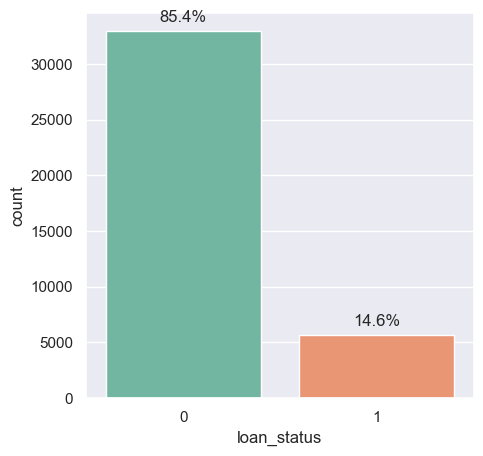

In [41]:
# Plot the variable distribution
sns.set()
plt.figure(figsize = (5,5))
custom_palette = sns.color_palette("Set2")
g = sns.countplot(x = loan['loan_status'], palette=custom_palette )

for p in g.patches:
    g.annotate('{:.1%}'.format(p.get_height()/len(loan['loan_status'])),
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Data analysis 

### Univariate Analysis
#### - Continuous Variables
#### - Categorical Variables
### Derived Metrices
#### - Business Driven Metrices
#### - Type Driven Metrices
#### - Data Driven Metrices
### Bivariate Analysis

In [42]:
#Gather the metadata on which univariate analysis to be performed
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38574 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38574 non-null  int64         
 1   funded_amnt             38574 non-null  int64         
 2   funded_amnt_inv         38574 non-null  float64       
 3   term                    38574 non-null  int64         
 4   int_rate                38574 non-null  float64       
 5   installment             38574 non-null  float64       
 6   grade                   38574 non-null  object        
 7   sub_grade               38574 non-null  object        
 8   emp_length              38574 non-null  object        
 9   home_ownership          38574 non-null  object        
 10  annual_inc              38574 non-null  float64       
 11  verification_status     38574 non-null  object        
 12  issue_d                 38574 non-null  datetime64[

## Univariate Analysis

### 1. Continuous Variable Analysis

Lets define some functions for plotting univariate continuous variables analysis w.r.t target variable : loan_status

In [157]:
# function for plotting continuous variable

def univariate_cont_var_plot(df, col):
    sns.set()
    
    fig,axes = plt.subplots(1,2)
    fig.set_size_inches(18,4)
    axes[0].set_title("Distribution Plot")
    sns.distplot(df[col], ax=axes[0])
    axes[1].set_title("Box Plot")
    #sns.boxplot(x = df[col], y = df['loan_status'], ax = axes[1])
    sns.boxplot(x = df['loan_status'], y = df[col],palette='Set2')
    plt.show()

In [135]:
# function for plotting continuous variable as bins

def univariate_cont_var_plot__default_bins(col,bins,labels):
    derived = loan[loan['loan_status'] == 1]
    
    derived_cut = pd.cut(derived[col], bins=bins, labels=labels)
    total = pd.cut(loan[col], bins=bins, labels=labels)
    x = (derived_cut.value_counts()/total.value_counts())*100
    ax = x.sort_values().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
    ax.set_xlabel(col)
    ax.set_ylabel('% of Defaulters')
    
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [138]:
# function for plotting continuous variable as bins

def univariate_cont_var_plot_nondefault_bins(col,bins,labels):
    derived = loan[loan['loan_status'] == 0]
    
    derived_cut = pd.cut(derived[col], bins=bins, labels=labels)
    total = pd.cut(loan[col], bins=bins, labels=labels)
    x = (derived_cut.value_counts()/total.value_counts())*100
    ax = x.sort_values().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
    ax.set_xlabel(col)
    ax.set_ylabel('% of Non-Defaulters')
    
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Variable : dti

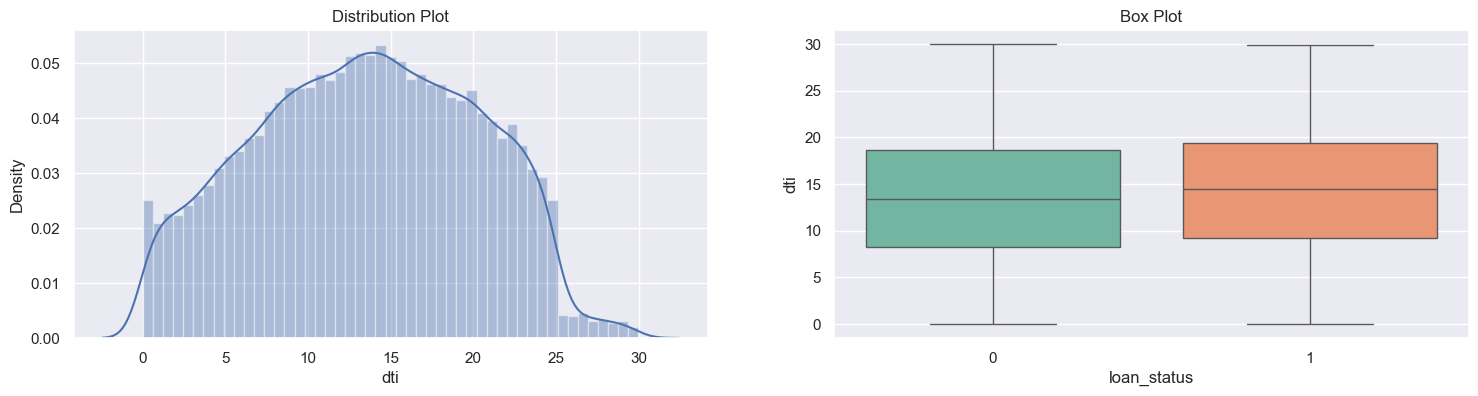

In [158]:
univariate_cont_var_plot(loan, 'dti')

In [46]:
# Summary Metrics
loan.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00",13.15,6.68,0.00,7.98,13.20,18.39,29.99
1,"5,627.00",14.00,6.59,0.00,9.05,14.29,19.29,29.85


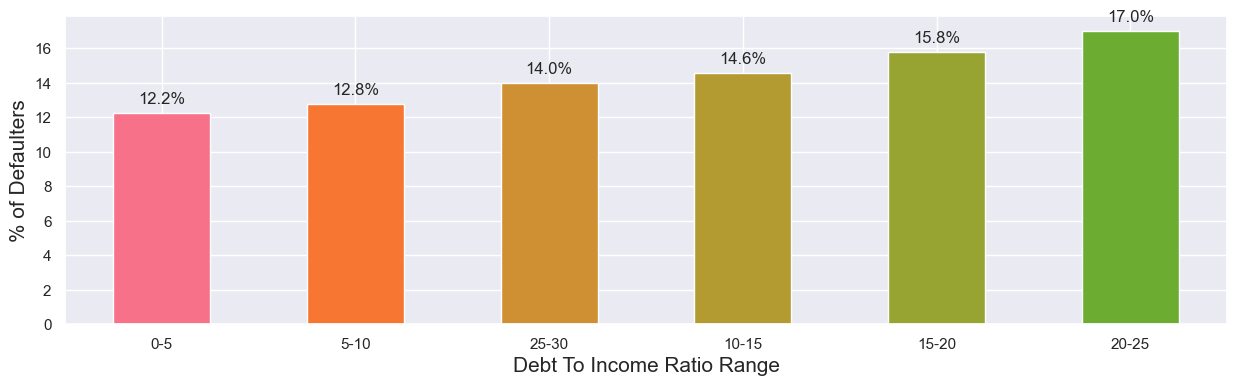

In [47]:
bins = [x for x in range(0, 31, 5)]
labels=[str(x)+'-'+str(x+5) for x in range (0, 30, 5)]

fig=univariate_cont_var_plot_bins('dti',bins,labels)
plt.xlabel("Debt To Income Ratio Range",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.show(fig)

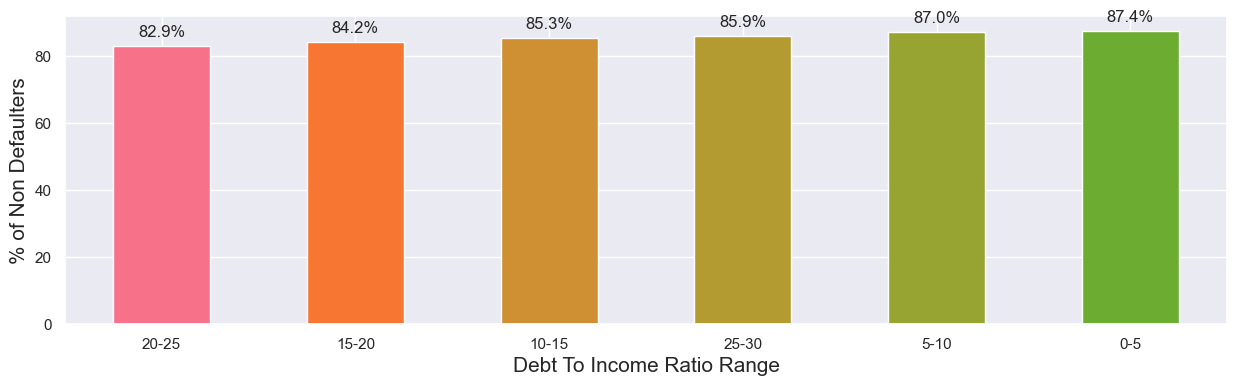

In [139]:
bins = [x for x in range(0, 31, 5)]
labels=[str(x)+'-'+str(x+5) for x in range (0, 30, 5)]

fig=univariate_cont_var_plot_nondefault_bins('dti',bins,labels)
plt.xlabel("Debt To Income Ratio Range",fontsize='15')
plt.ylabel("% of Non Defaulters",fontsize='15')
plt.show(fig)

**Insights :** 1. Percentage of defaulters increases when dti increases 

2. It's risky to lend money when borrowers dti is greater than 20%.

### Variable : delinq_2yrs

In [48]:
# Check the value count as percentage
loan['delinq_2yrs'].value_counts(normalize = True)*100

delinq_2yrs
0    89.14
1     8.31
2     1.74
3     0.55
4     0.16
5     0.05
6     0.03
7     0.01
8     0.01
9     0.00
11    0.00
Name: proportion, dtype: float64

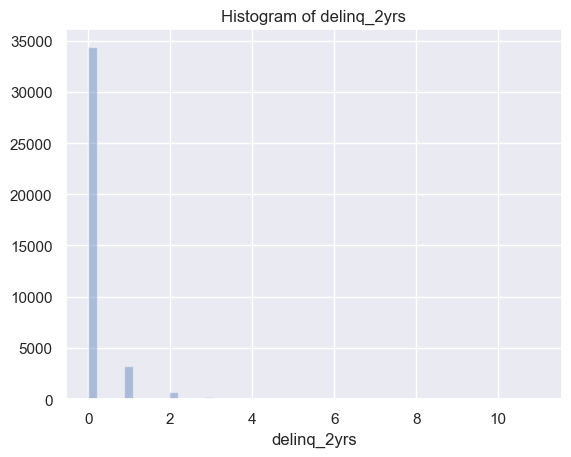

In [49]:
#Plot for frequency distribution
sns.distplot(loan.delinq_2yrs, kde=False)
plt.title('Histogram of delinq_2yrs')
plt.show();

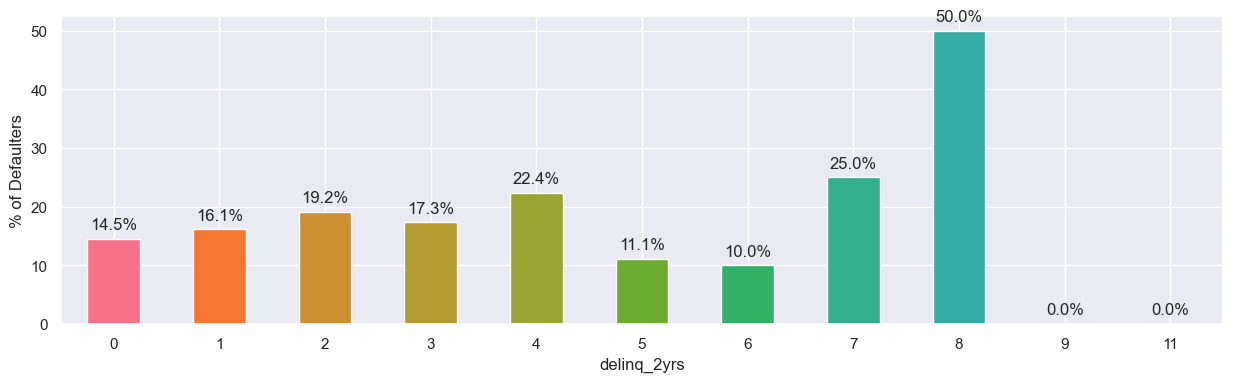

In [140]:
# Plot % of Defaulters

derived = loan[loan['loan_status'] == 1]
    
derived_cut = (derived['delinq_2yrs'].value_counts()/loan['delinq_2yrs'].value_counts())*100
derived_cut.fillna(0, inplace=True)
ax = derived_cut.sort_index().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
ax.set_xlabel('delinq_2yrs')
ax.set_ylabel('% of Defaulters')
    

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

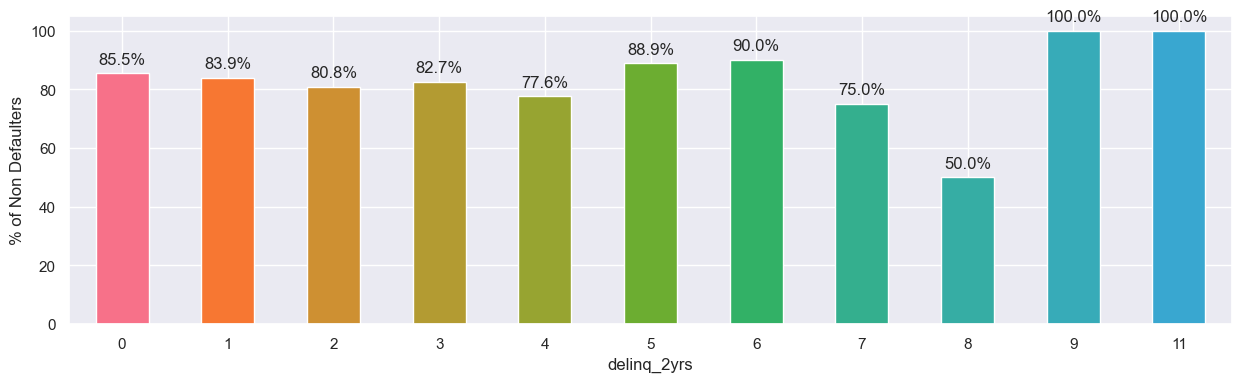

In [141]:
# Plot % of non Defaulters

derived = loan[loan['loan_status'] == 0]
    
derived_cut = (derived['delinq_2yrs'].value_counts()/loan['delinq_2yrs'].value_counts())*100
derived_cut.fillna(0, inplace=True)
ax = derived_cut.sort_index().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
ax.set_xlabel('delinq_2yrs')
ax.set_ylabel('% of Non Defaulters')
    

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Insights :** 1. The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11. 

2. There are higher chances of default if this variable is greater than 1.

### Variable : open_cc

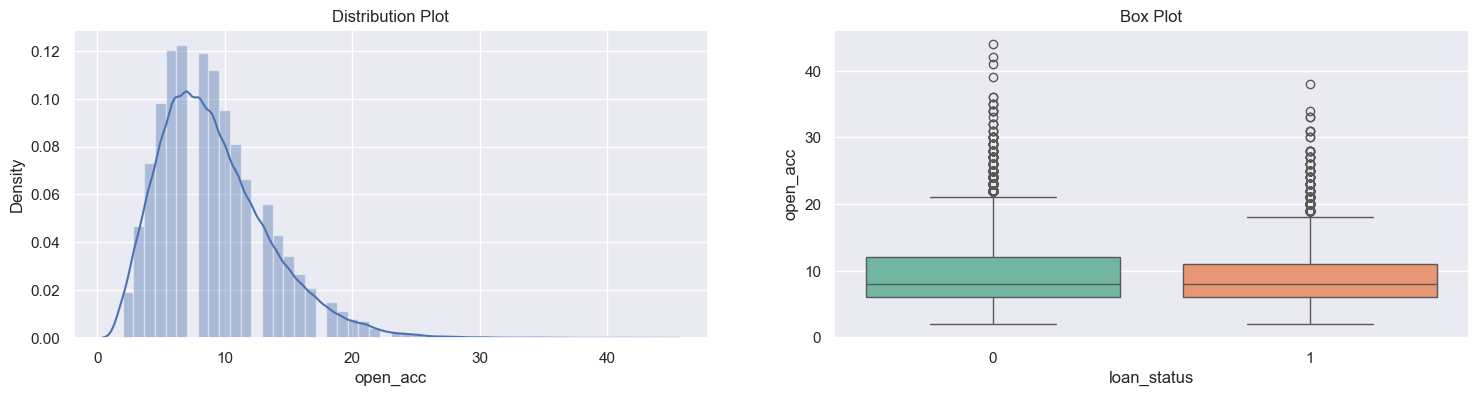

In [159]:
univariate_cont_var_plot(loan, 'open_acc')

In [52]:
loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00",9.29,4.38,2.00,6.00,9.00,12.00,44.00
1,"5,627.00",9.18,4.53,2.00,6.00,8.00,12.00,38.00


**Insights:** 1. The median of distribution sugests that by large the borrower's seem to have 9 open credit lines. 2. There is no significant difference in the credit lines of charged off and fully paid loans.

### Variable : pub_rec

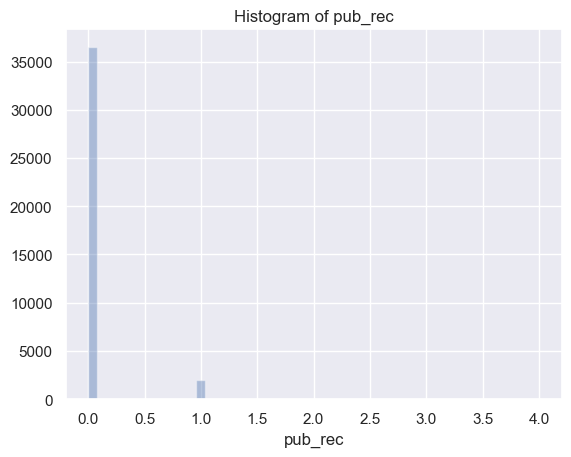

In [53]:
# Plot of pub_rec vs Frequency
sns.distplot(loan.pub_rec, kde=False)
plt.title('Histogram of pub_rec')
plt.show();

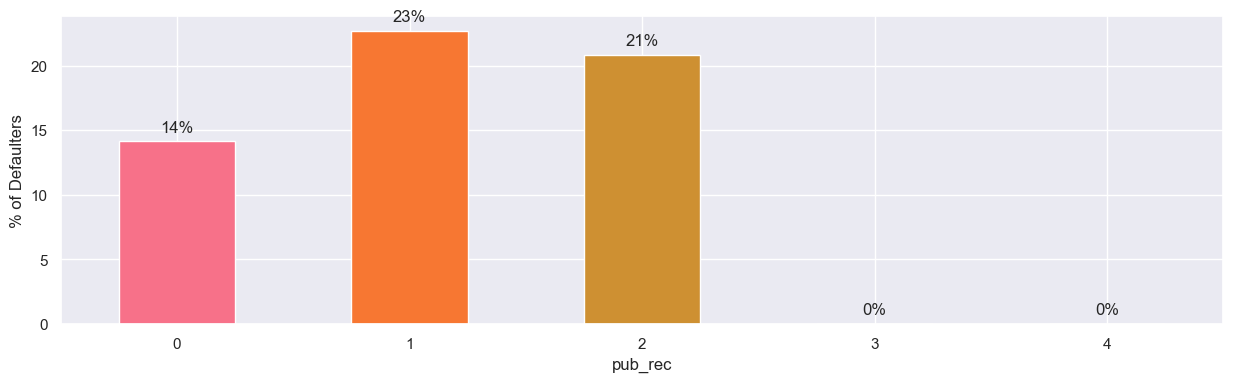

In [54]:
# Plot % of Defaulters

derived = loan[loan['loan_status'] == 1]
    
derived_cut = (derived['pub_rec'].value_counts()/loan['pub_rec'].value_counts())*100
derived_cut.fillna(0, inplace=True)
ax = derived_cut.sort_index().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
ax.set_xlabel('pub_rec')
ax.set_ylabel('% of Defaulters')
    

for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [55]:
loan.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00",0.05,0.23,0.00,0.00,0.00,0.00,4.00
1,"5,627.00",0.08,0.28,0.00,0.00,0.00,0.00,2.00


**Insights:** 1. 94% have no Public derogatory records. 5% have 1 derogatory record. 2. Having even 1 derogatory record increases the chances of Charge Off significantly.

### Variable : loan_amnt

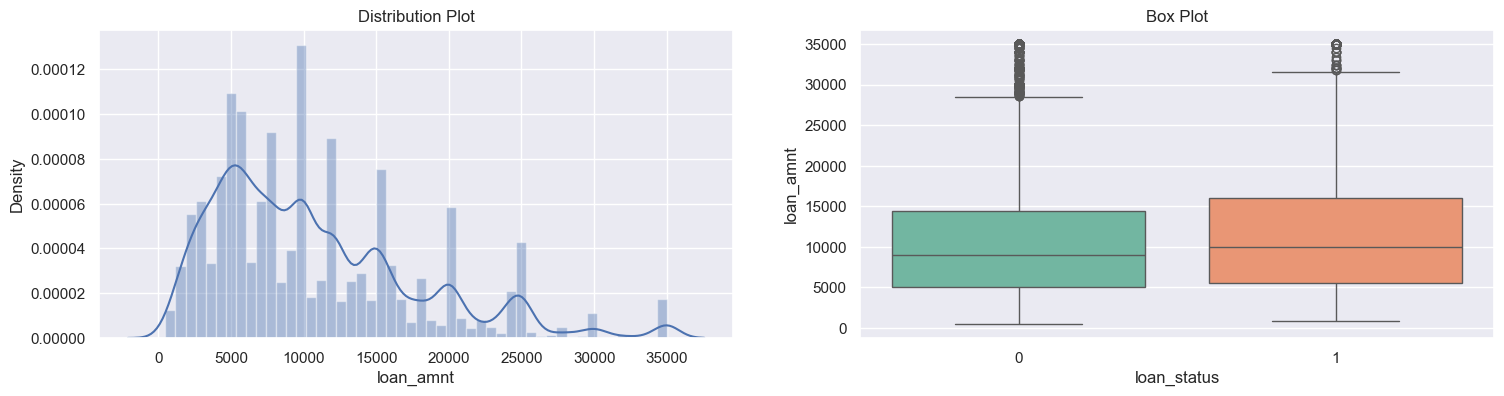

In [160]:
univariate_cont_var_plot(loan, 'loan_amnt')

In [57]:
# Summary Metrics

loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00","10,866.94","7,199.72",500.00,"5,200.00","9,600.00","15,000.00","35,000.00"
1,"5,627.00","12,104.39","8,085.73",900.00,"5,600.00","10,000.00","16,500.00","35,000.00"


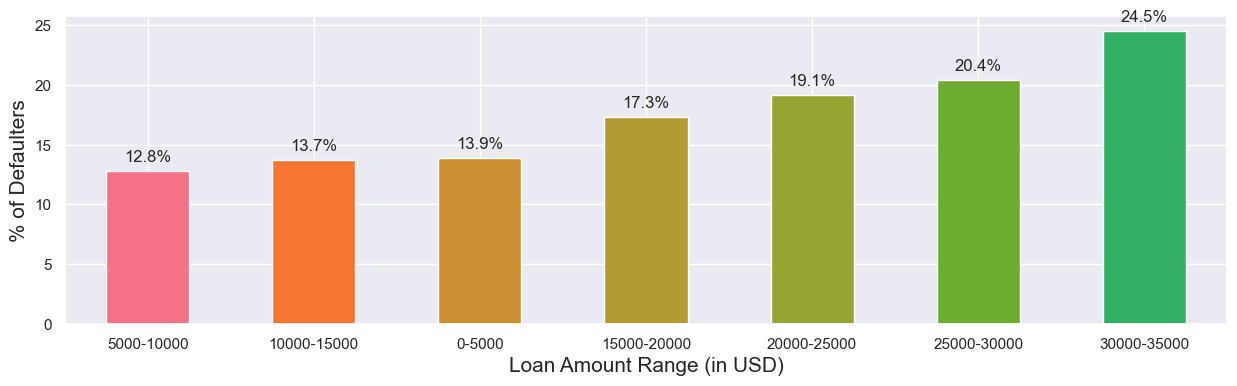

In [58]:
# Plot % of Defaulters

bins = [x for x in range(0, 36000, 5000)]
labels=[str(x)+'-'+str(x+5000) for x in range (0, 35000, 5000)]

fig=univariate_cont_var_plot_bins('loan_amnt',bins,labels)
plt.xlabel("Loan Amount Range (in USD)",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.show(fig)

**Insights:** 1. Overall, the applied loan amount distribution is slightly right-skewed . 2. Most of the loans granted are below 15000 (75 percentile value) 3. Funding amounts see a spike around each 5000 boundary. 4. Charged off loans are shifted towards higher average loan amount request.

### Variable : Installment

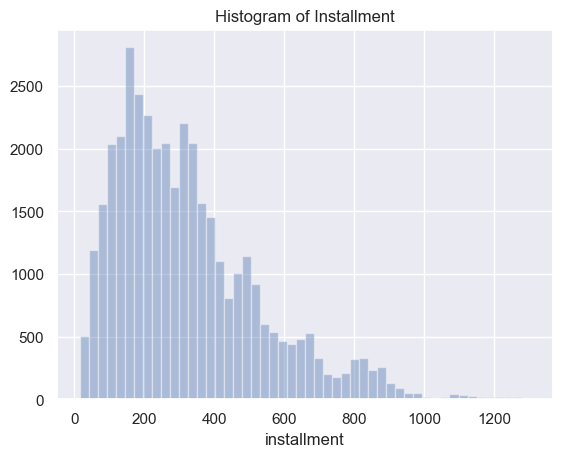

In [59]:
# Plot the frequency distribution
sns.distplot(loan.installment, kde=False)
plt.title('Histogram of Installment')
plt.show();

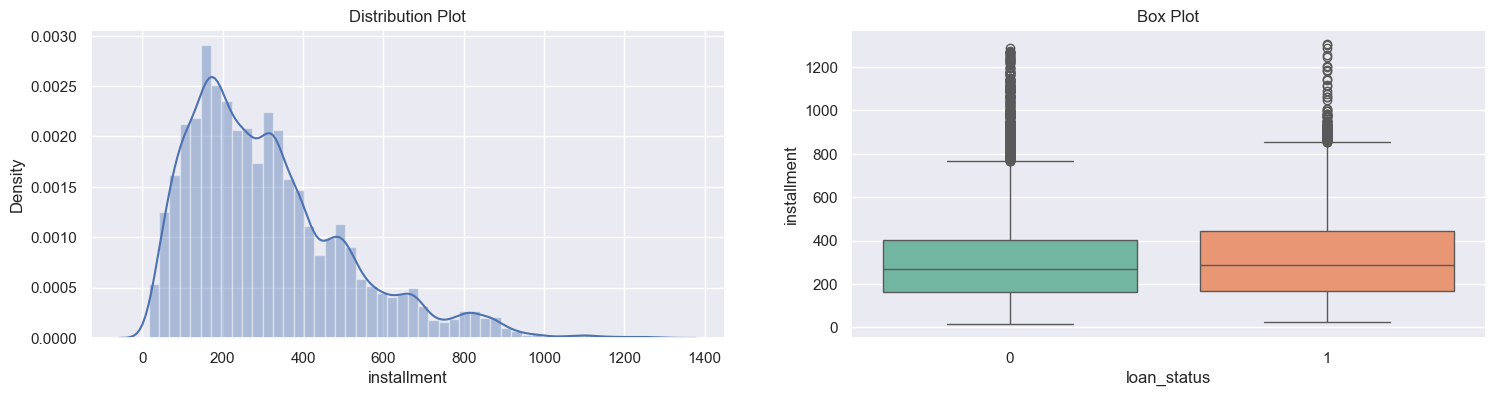

In [161]:
# Plot the variable distribution
univariate_cont_var_plot(loan,'installment')

In [61]:
# Summary Metrics

loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00",320.14,207.08,15.69,165.32,275.66,420.84,"1,295.21"
1,"5,627.00",336.18,217.05,22.79,168.56,293.87,457.84,"1,305.19"


**Insights:** 1. Installment amount varies largely between 165 to 420 with median of 275 for Non-defaulters 2. Charged Off loan have high installment on average compare to fully paid

### Variable : annual_inc

<Axes: xlabel='annual_inc'>

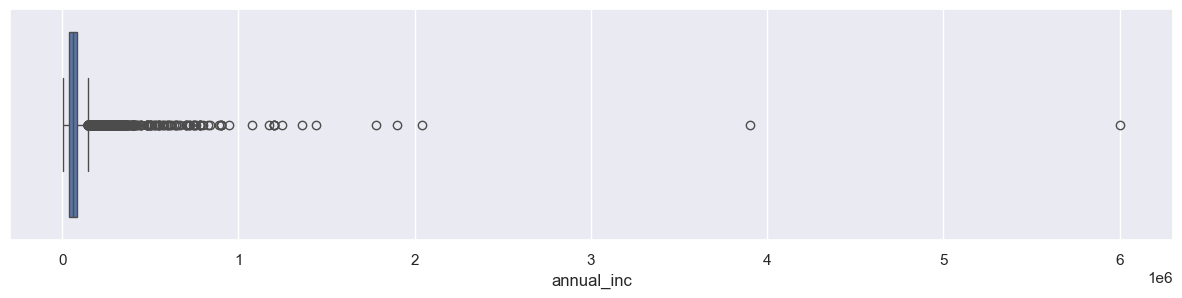

In [62]:
#Plot the frequency distribution
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan['annual_inc'], data=loan)

### **Handling Outliers in Annual Income**

We can easily see there are some outliers which makes the graph difficult for analysis on annual income column, lets remove the outliers

In [63]:
# Summary Metrics
loan['annual_inc'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9,0.95,0.96,0.97,0.98,0.99,0.995,0.999])

count      38,574.00
mean       68,777.04
std        64,220.01
min         4,000.00
10%        30,000.00
25%        40,000.00
50%        58,860.28
75%        82,000.00
90%       115,000.00
95%       140,004.00
96%       150,000.00
97%       165,000.00
98%       187,000.00
99%       234,162.00
99.5%     300,000.00
99.9%     700,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

In [64]:
#Remove the outliers and remove the records above 95%
loan = loan[loan['annual_inc'] <= loan['annual_inc'].quantile(0.95)]

In [65]:
loan.annual_inc.describe()

count    36,651.00
mean     60,854.12
std      27,748.21
min       4,000.00
25%      40,000.00
50%      56,000.00
75%      77,947.00
max     140,004.00
Name: annual_inc, dtype: float64

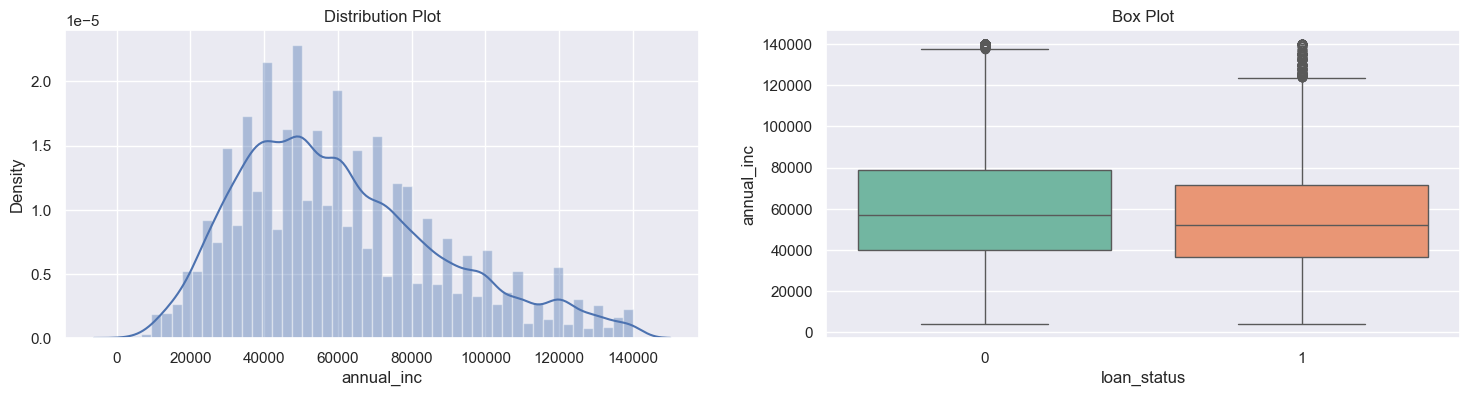

In [162]:
# Plot the variable distribution

univariate_cont_var_plot(loan, 'annual_inc')

In [67]:
# Summary Metrics
loan.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"31,233.00","61,619.54","27,874.97","4,000.00","40,000.00","57,000.00","79,000.00","140,004.00"
1,"5,418.00","56,441.76","26,582.05","4,080.00","36,297.75","51,996.00","71,287.00","140,004.00"


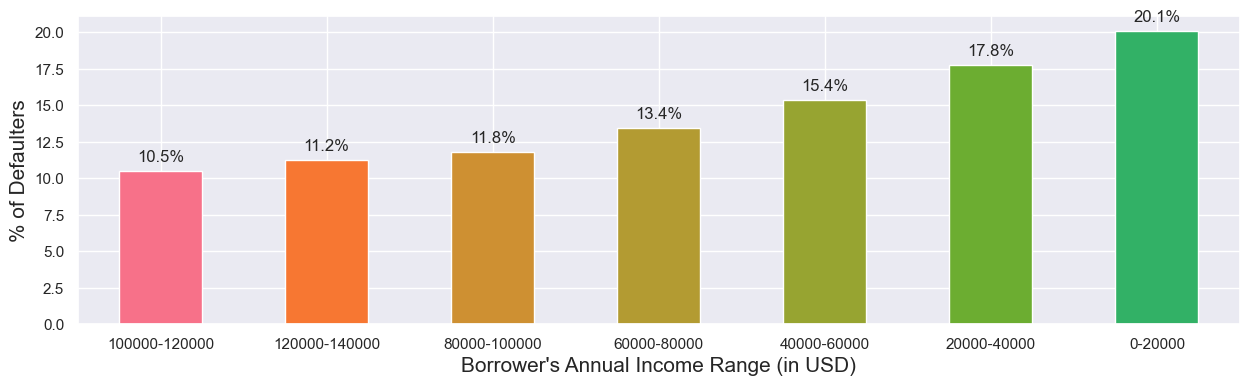

In [68]:
# Plot % of Defaulters

bins = [x for x in range(0, 150000, 20000)]
labels=[str(x)+'-'+str(x+20000) for x in range (0, 140000, 20000)]

fig=univariate_cont_var_plot_bins('annual_inc',bins,labels)
plt.xlabel("Borrower's Annual Income Range (in USD)",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.show(fig)

**Insights :** The lower the income the higher the chances of become defaulters

### 2. Univariate Analysis for Categorical Variables

Columns which can be used for categorical analysis.

In [69]:
#List of Categorical Variables for analysis
contegorical_variables=loan.select_dtypes(include=['object'])
contegorical_variables.columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'addr_state'],
      dtype='object')

In [70]:
# Plot the categorical variable

def univariate_categorical_var_plot(df,col):
    ax = sns.countplot(x = col, data = df, order=df[col].value_counts().sort_values().index,palette=sns.color_palette('husl', 16))
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Variable under investigation : Issue_Year

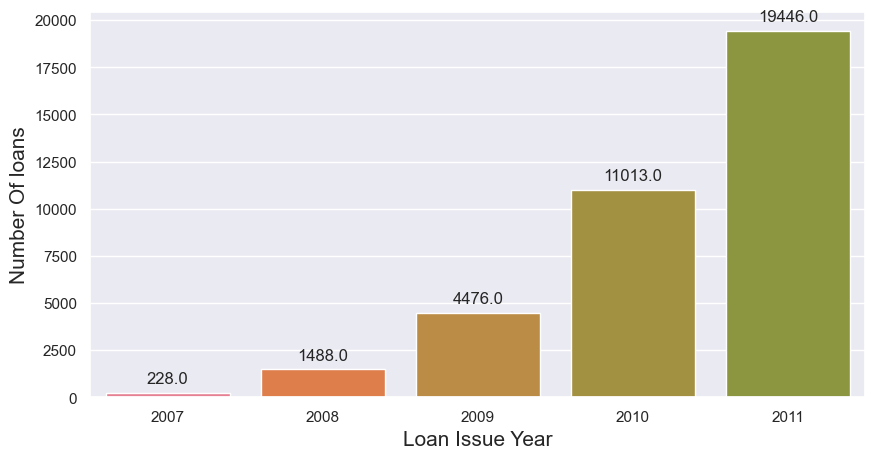

In [71]:
# Plot the variable distribution
plt.figure(figsize=(10, 5))
fig=univariate_categorical_var_plot(loan, 'issue_year')
plt.xlabel("Loan Issue Year",fontsize='15')
plt.ylabel("Number Of loans",fontsize='15')
plt.show(fig)

### Variable under investigation : Grade

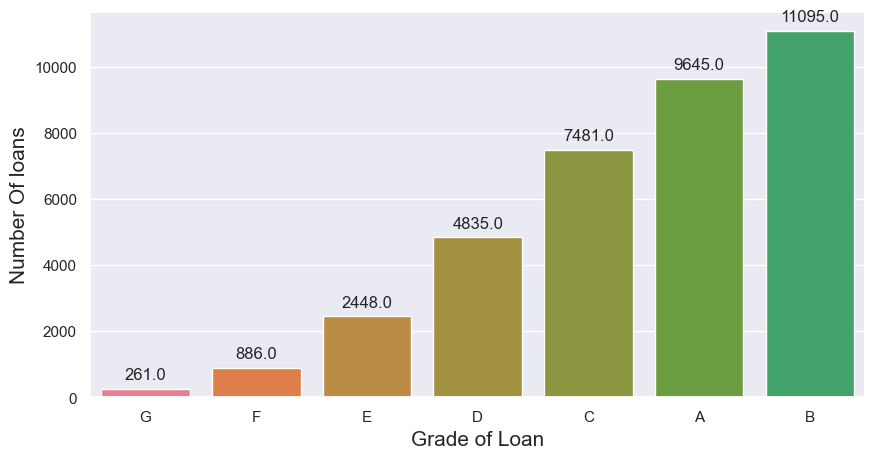

In [72]:
# Plot the variable distribution
plt.figure(figsize=(10, 5))
fig=univariate_categorical_var_plot(loan, 'grade')
plt.xlabel("Grade of Loan",fontsize='15')
plt.ylabel("Number Of loans",fontsize='15')
plt.show(fig)

### Variable under investigation : Term

The unique values in term column are,  [36 60]


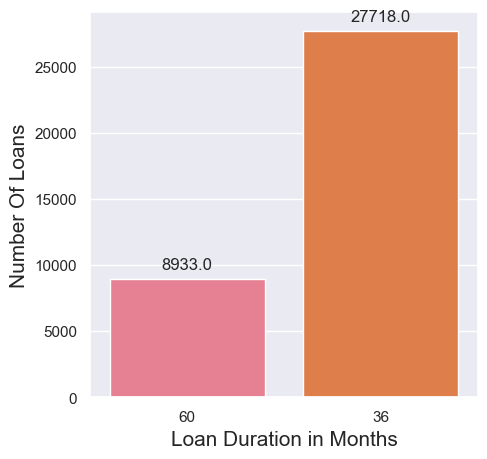

Insights:
	The most frequent term for loans is 36 months.


In [73]:
print('The unique values in term column are, ', loan['term'].unique())

# Plot the variable distribution
plt.figure(figsize=(5, 5))
fig=univariate_categorical_var_plot(loan, 'term')
plt.xlabel("Loan Duration in Months",fontsize='15')
plt.ylabel("Number Of Loans",fontsize='15')
plt.show(fig)
    
print('Insights:\n\tThe most frequent term for loans is 36 months.')

### Variable under investigation : home_ownership

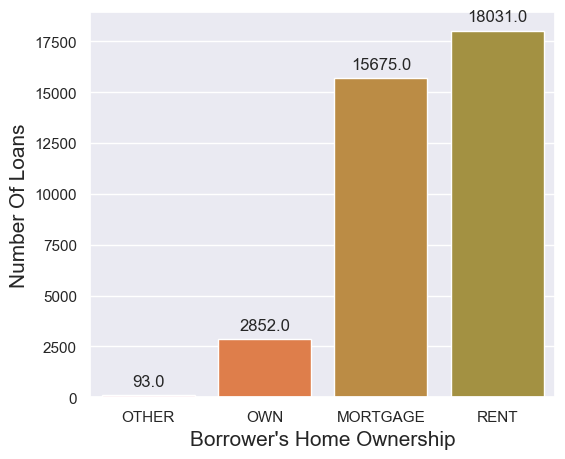

Insights:
	People who are staying in rented house are given most of the loans, 
	Followed by people staying in a mortgaged home.


In [74]:
# Distribution plot for home ownership
home_ownership = loan["home_ownership"].value_counts()

# Plot the variable distribution
plt.figure(figsize=(6, 5))
fig=univariate_categorical_var_plot(loan, 'home_ownership')
plt.xlabel("Borrower's Home Ownership",fontsize='15')
plt.ylabel("Number Of Loans",fontsize='15')
plt.show(fig)

print('Insights:\n\tPeople who are staying in rented house are given most of the loans,',
      '\n\tFollowed by people staying in a mortgaged home.')

### Variable under investigation : Purpose

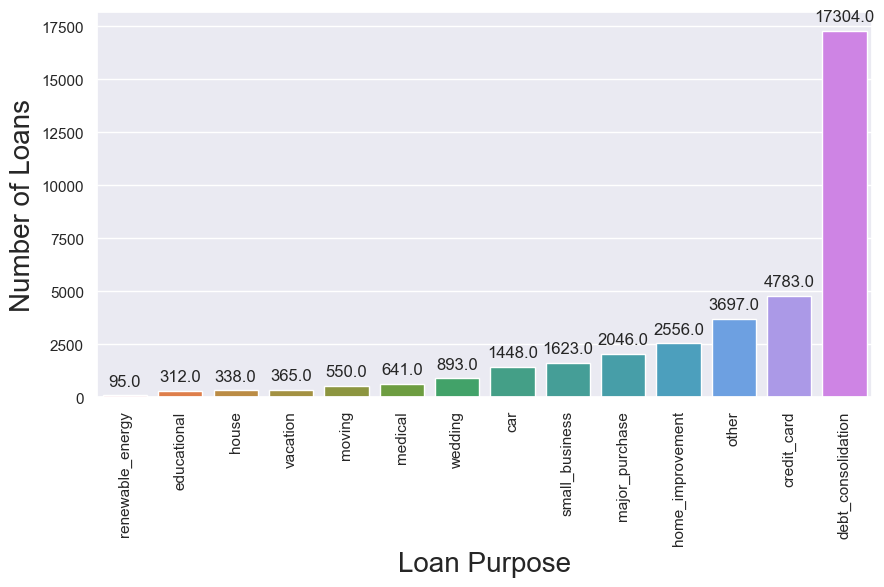

In [75]:
# Plot the variable distribution
plt.figure(figsize=(10, 5))
univariate_categorical_var_plot(loan, 'purpose')
plt.xlabel("Loan Purpose",fontsize='20')
plt.ylabel("Number of Loans",fontsize='20')
plt.xticks(rotation=90)
plt.show(fig)

### Variable under investigation : addr_state

Number of unique address to which borrower belong:  50


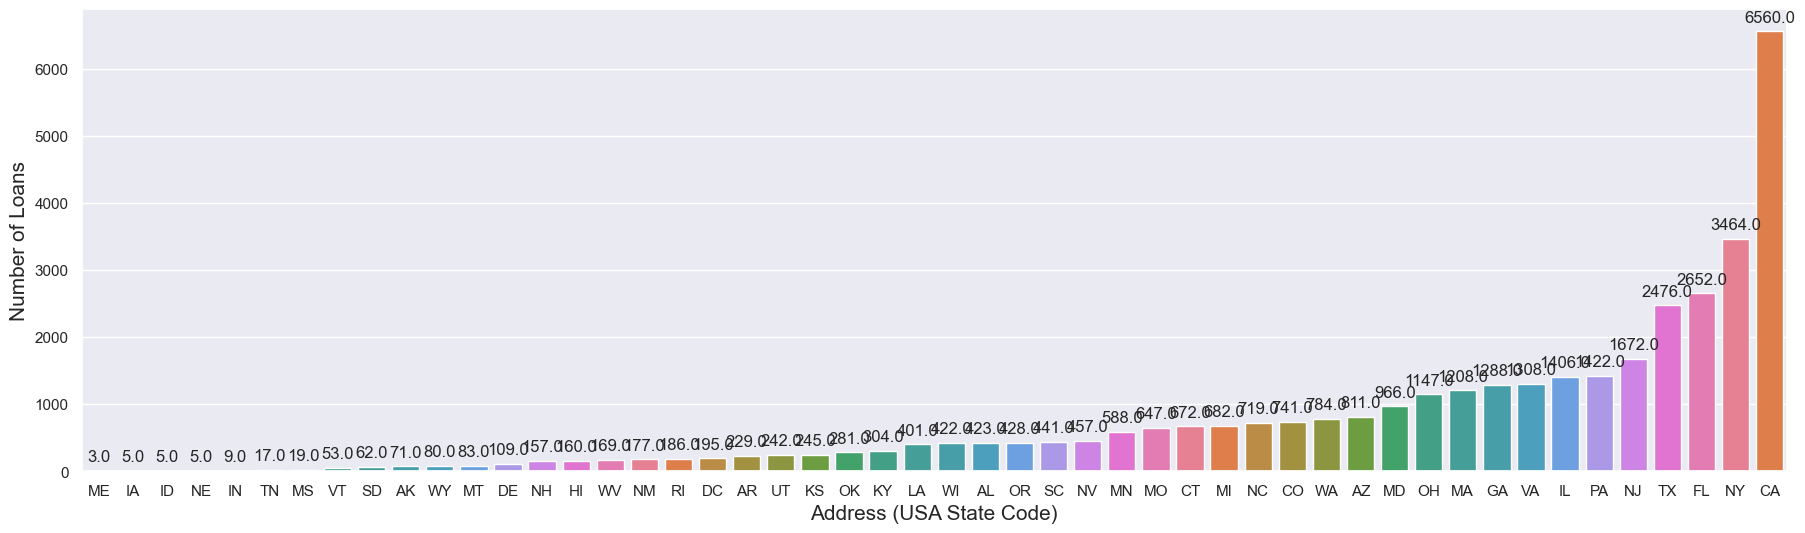

Insights:
	Maximum number of borrowers are from CA to whom loans are given



In [76]:
# Statewise Distribution plotting
print("Number of unique address to which borrower belong: ",loan.addr_state.nunique())

plt.figure(figsize=(22, 6))
fig=univariate_categorical_var_plot(loan, 'addr_state')
plt.xlabel("Address (USA State Code)",fontsize='15')
plt.ylabel("Number of Loans",fontsize='15')
plt.show(fig)

print('Insights:\n\tMaximum number of borrowers are from CA to whom loans are given\n')

#### Now, lets do some analysis on percentage of charged-off customers w.r.t categorical variables

In [77]:
# Plot % of Defaulters

def univariate_defaulters_plot_perc(df,col):
    derived = df[df['loan_status'] == 1]
    
    derived_cut = (derived[col].value_counts()/df[col].value_counts())*100
    x = derived[col].value_counts().sort_values()
    ax = derived_cut.sort_values().plot.bar(rot=0,color=sns.color_palette('husl', 16))
    ax.set_xlabel(col)
    ax.set_ylabel('% of Defaulters')
    
    
    for p in ax.patches:
        ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

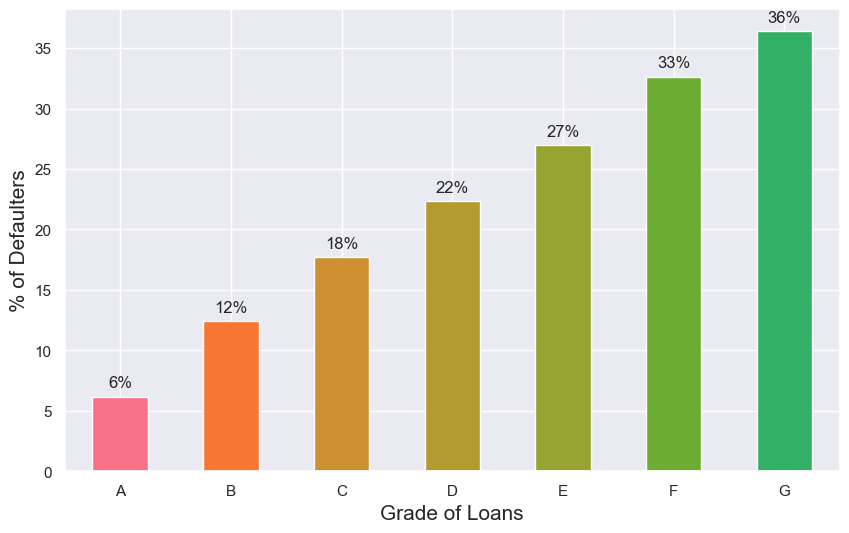

In [78]:
# Plot grade vs % of Defaulters
plt.figure(figsize=(10, 6))
fig=univariate_defaulters_plot_perc(loan, 'grade')
plt.xlabel("Grade of Loans",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

**Insights:** 1. The default rate increases as the grade of loan goes from A to G. 2. This is as expected because the grade is decided by Lending Club based on the riskiness of the loan.

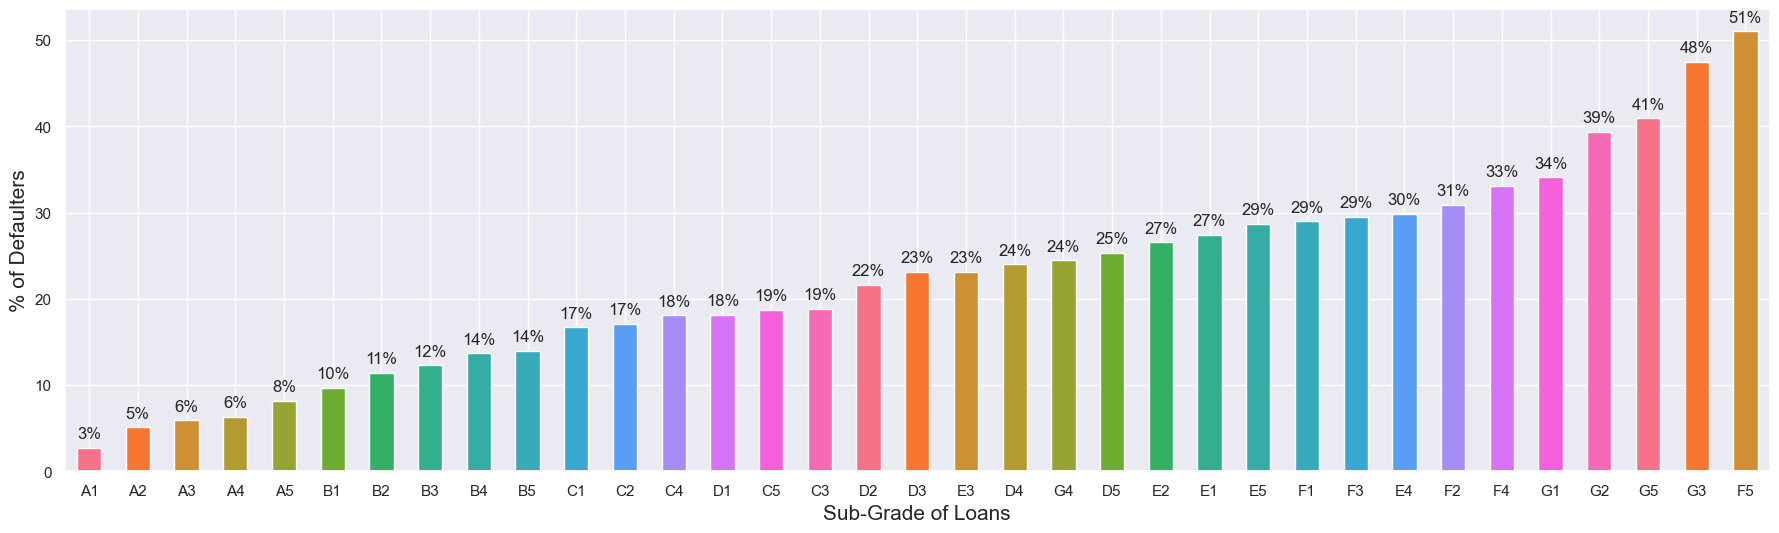

In [79]:
# sub-grade: result as expected - % of defaulters are increasing from A1 to A2 to A3 to A4 and so on.
plt.figure(figsize=(22, 6))
fig=univariate_defaulters_plot_perc(loan, 'sub_grade')
plt.xlabel("Sub-Grade of Loans",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

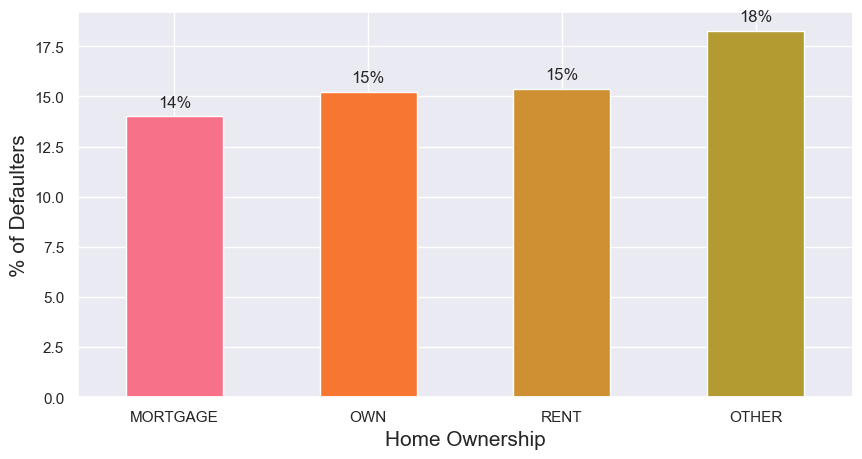

In [80]:
# Plot home ownership vs % of Defaulters

plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan, 'home_ownership')
plt.xlabel("Home Ownership",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

**Insights:** 1. Home_ownership isn't great indicator of loan defaults as almost all categories default percenatge is relatively close. 2. Still, Others category have higher chances of defaulting a loan.

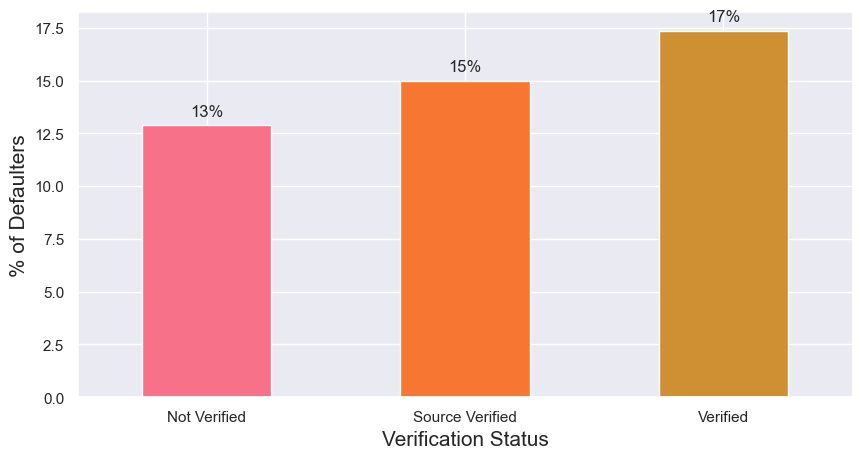

In [81]:
# Plot verification_status vs % of Defaulters

plt.figure(figsize=(10,5))
fig=univariate_defaulters_plot_perc(loan, 'verification_status')
plt.xlabel("Verification Status",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

**Insights:** 1. Default rate is highest for Verified income types and lowest for non-verified, which is quite strange as per provided dataset.

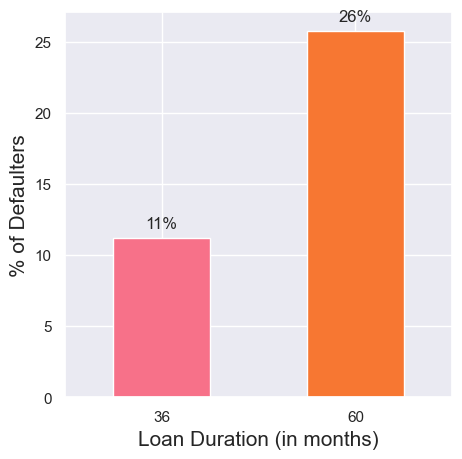

In [82]:
# Plot % of Defaulters

plt.figure(figsize=(5, 5))
fig=univariate_defaulters_plot_perc(loan, 'term')
plt.xlabel("Loan Duration (in months)",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

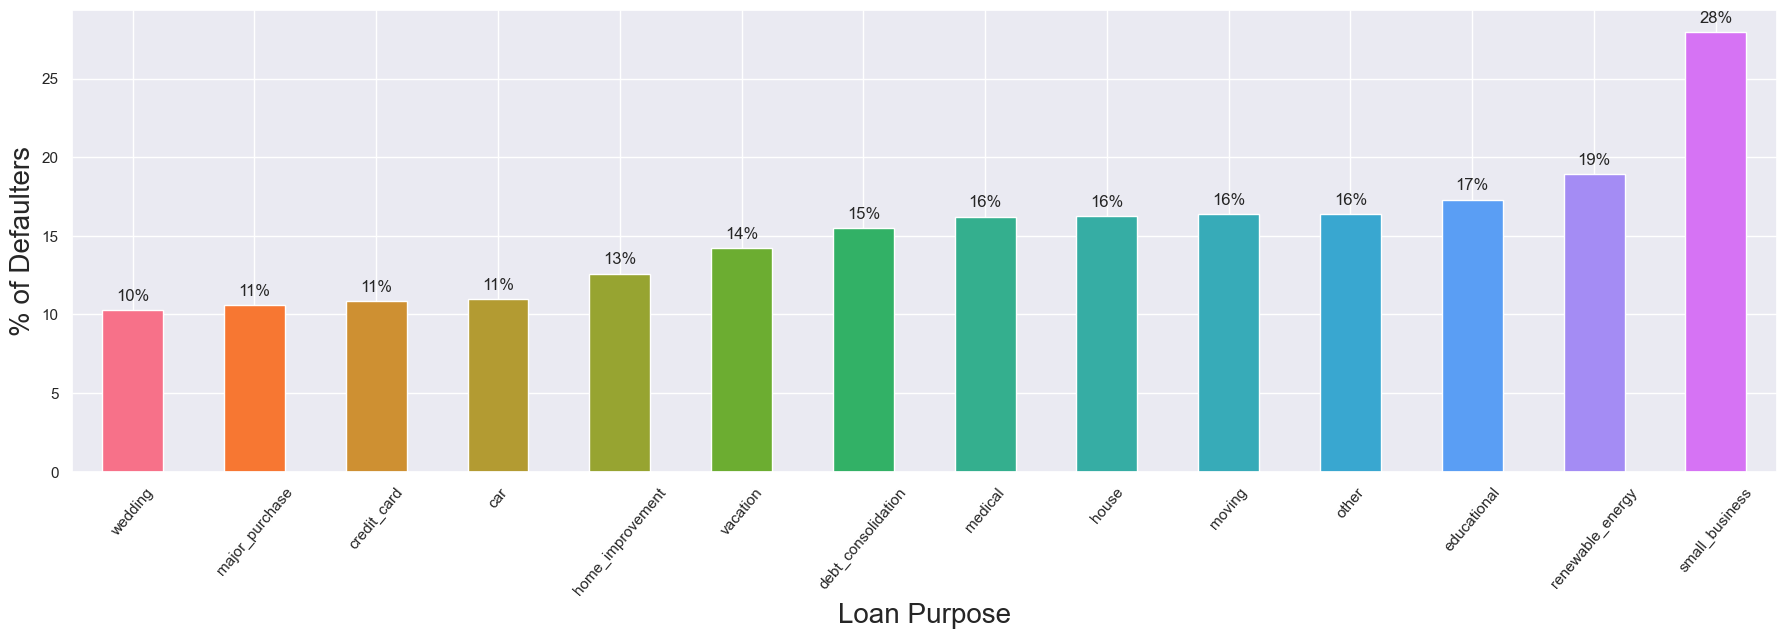

In [83]:
# Plot % of Defaulters

plt.figure(figsize=(22, 6))
fig=univariate_defaulters_plot_perc(loan, 'purpose')
plt.xlabel("Loan Purpose",fontsize='20')
plt.ylabel("% of Defaulters",fontsize='20')
plt.xticks(rotation=50)
plt.show(fig)

**Insights:** 1. Most of the borrowers take loan to clear off some other debts (As per frequency plot) 2. small business loans default the most, followed by renewable energy and education.

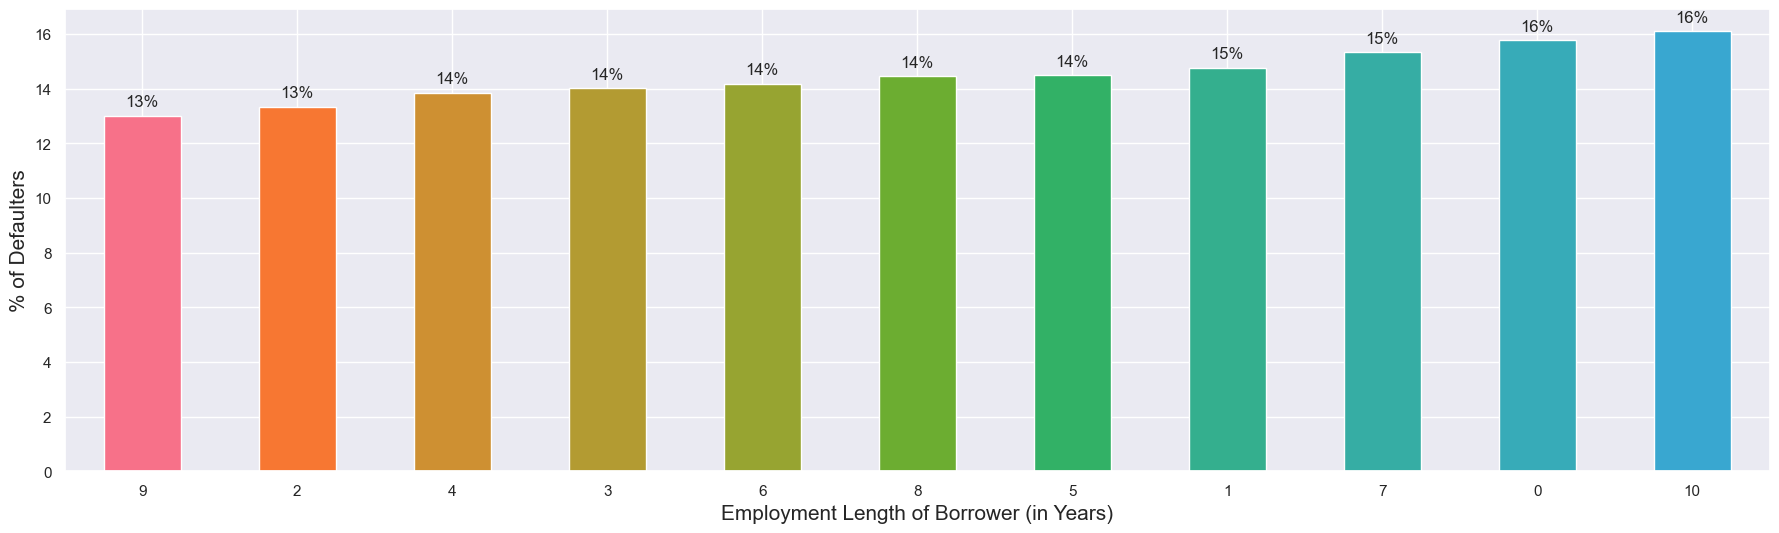

In [84]:
# Plot emp_length vs % of Defaulters
# Highest defaulters in 10+ yr emp_length.
plt.figure(figsize=(22, 6))
fig=univariate_defaulters_plot_perc(loan, 'emp_length')
plt.xlabel("Employment Length of Borrower (in Years)",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.show(fig)

**Insights:** 1. Borrowers having employment length greater than or equal to 10 are more likely to default a loan

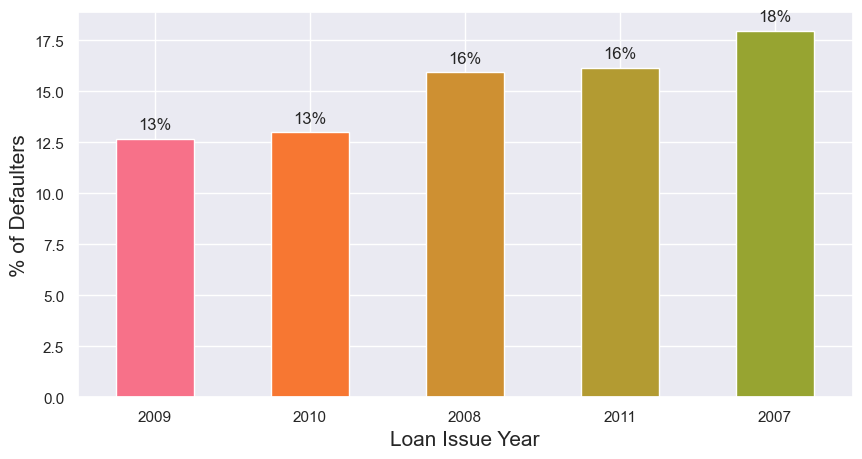

In [85]:
# comparing the default rates across years
# the default rate is reducing from 2008 till 2010 , then suddenly increased in 2011 
plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan,"issue_year")
plt.xlabel("Loan Issue Year",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

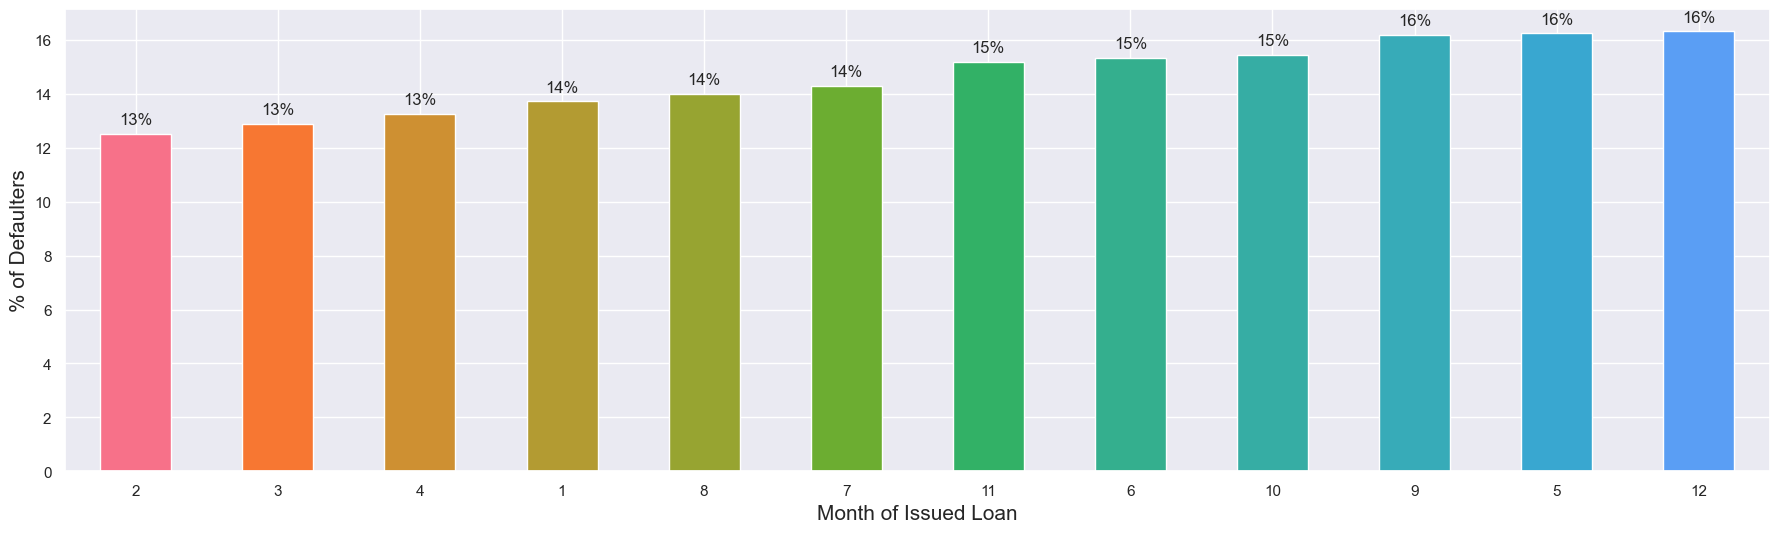

In [86]:
# Plotting default rate across months.Not much variation across months.
plt.figure(figsize=(22, 6))
fig=univariate_defaulters_plot_perc(loan,"issue_month")
plt.xlabel("Month of Issued Loan",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

## 4.2 Derived Metrices

To analyse how default rates vary across continous variables we can bin the variables into discrete categories.

Creating bins for the loan amount variable as small, medium, high, very high.

Type Driven Metrics : loan_amnt_bin

In [87]:
#Function to create category under loan_amnt_bin new variable
def amount_bin(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt_bin'] = loan['loan_amnt'].apply(lambda x: amount_bin(x))

In [88]:
#Check the value count under each category
loan['loan_amnt_bin'].value_counts()

loan_amnt_bin
medium       20016
low           7339
high          7109
very high     2187
Name: count, dtype: int64

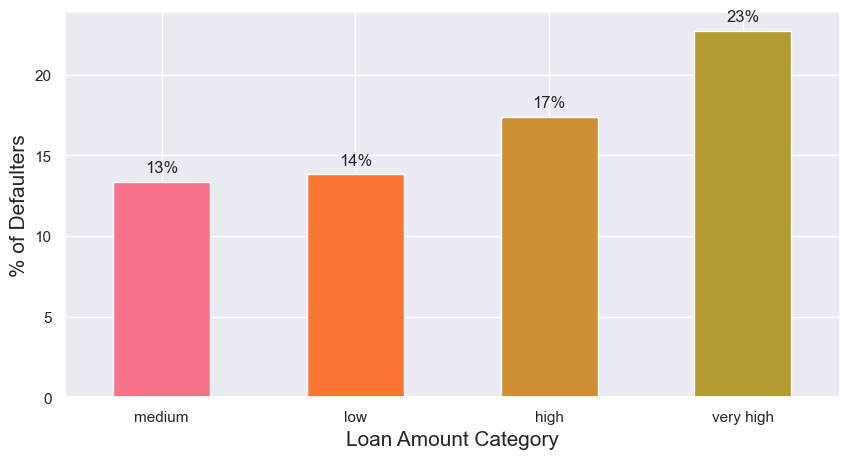

In [89]:
# comparing default rates across loan amount type
# higher the loan amount, higher the default rate
plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan, 'loan_amnt_bin')
plt.xlabel("Loan Amount Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

### Type Driven Metrics : funded_amnt_bin

In [90]:
# creating bins for funded amount
loan['funded_amnt_bin'] = loan['funded_amnt'].apply(lambda x: amount_bin(x))

In [91]:
#Check the value count under each category
loan['funded_amnt_bin'].value_counts()

funded_amnt_bin
medium       20463
low           7432
high          6904
very high     1852
Name: count, dtype: int64

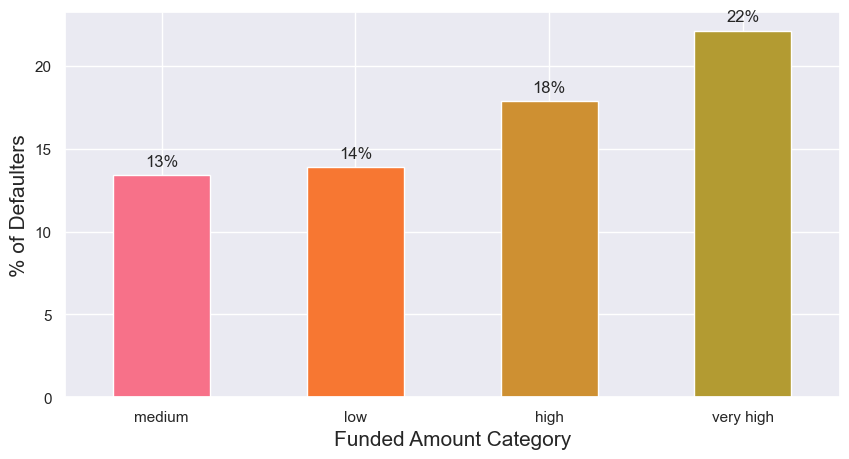

In [92]:
# Plotting funding amount vs default rate
# Default rate is HIGH for very HIGH funded amounts
plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan, 'funded_amnt_bin')
plt.xlabel("Funded Amount Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

### Type Driven Metrics : funded_amnt_inv_bin

In [93]:
# creating bins for funded amount
loan['funded_amnt_inv_bin'] = loan['funded_amnt_inv'].apply(lambda x: amount_bin(x))
#Check value count under each category
loan['funded_amnt_inv_bin'].value_counts()

funded_amnt_inv_bin
medium       20275
low           9224
high          6091
very high     1061
Name: count, dtype: int64

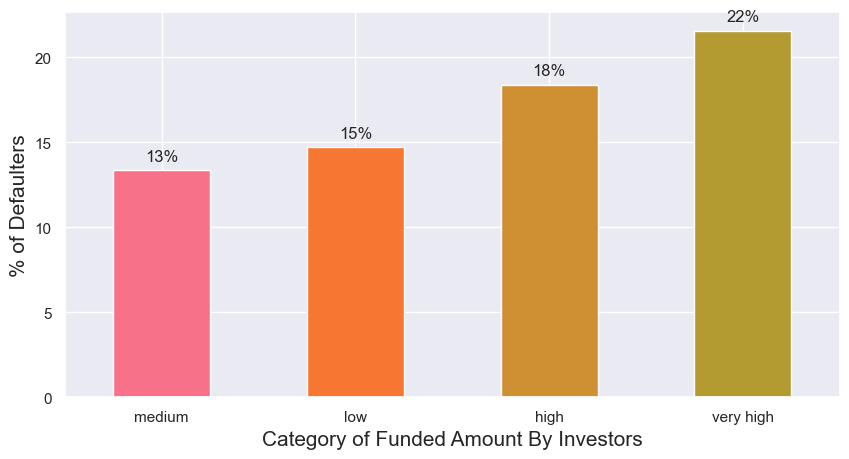

In [94]:
# Plotting funding amount invested
plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan, 'funded_amnt_inv_bin')
plt.xlabel("Category of Funded Amount By Investors",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

### Type Driven Metrics : int_rate_bin

In [95]:
# Classifying interest rate to bins low, medium, high

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate_bin'] = loan['int_rate'].apply(lambda x: int_rate(x))

In [96]:
#Check the value count under each category
loan['int_rate_bin'].value_counts()

int_rate_bin
medium    17377
low       11821
high       7453
Name: count, dtype: int64

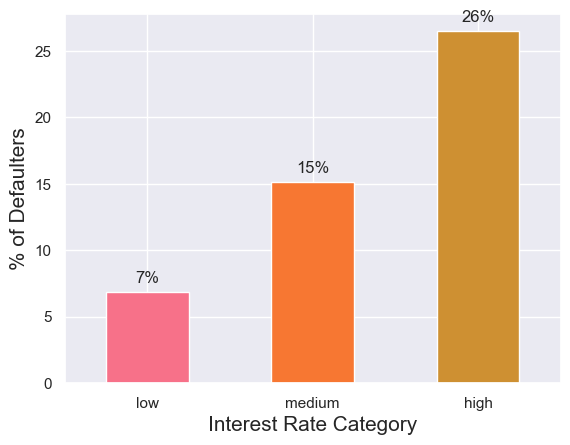

In [97]:
# Plotting interest rate bins vs % of defaulters

fig=univariate_defaulters_plot_perc(loan, 'int_rate_bin')
plt.xlabel("Interest Rate Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

### Type Driven Metrics : dti_bin

In [98]:
#Creating bins for debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti_bin'] = loan['dti'].apply(lambda x: dti(x))
#Check the value count under each category
loan['dti_bin'].value_counts()

dti_bin
medium    17693
low       11885
high       7073
Name: count, dtype: int64

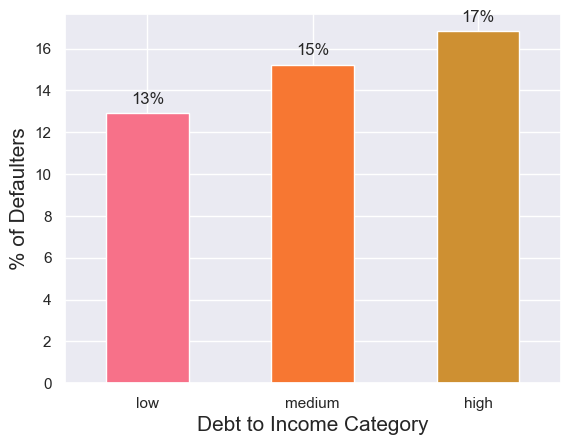

In [99]:
# Plotting debt to income ratio vs % of defaulters

fig=univariate_defaulters_plot_perc(loan, 'dti_bin')
plt.xlabel("Debt to Income Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

### Type Driven Metrics : installment_bin

In [100]:
# creating bins for installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment_bin'] = loan['installment'].apply(lambda x: installment(x))
loan['installment_bin'].value_counts()

installment_bin
medium       14213
low          12833
high          6134
very high     3471
Name: count, dtype: int64

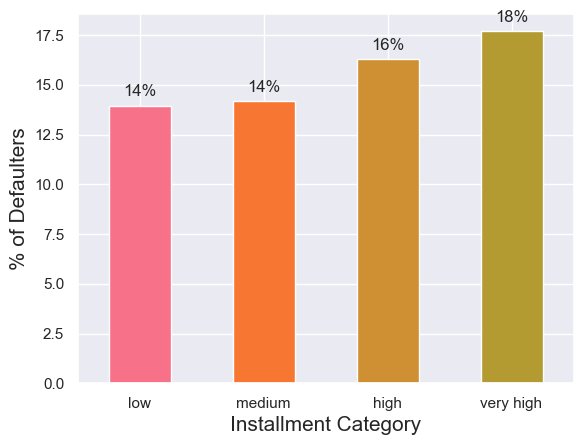

In [101]:
# Plotting installment bins vs % of defaulters

fig=univariate_defaulters_plot_perc(loan, 'installment_bin')
plt.xlabel("Installment Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

### Type Driven Metrics : annual_inc_bin

In [102]:
# Binning the annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc_bin'] = loan['annual_inc'].apply(lambda x: annual_income(x))
#Check the value count under each category
loan['annual_inc_bin'].value_counts()

annual_inc_bin
medium    17706
low       15388
high       3557
Name: count, dtype: int64

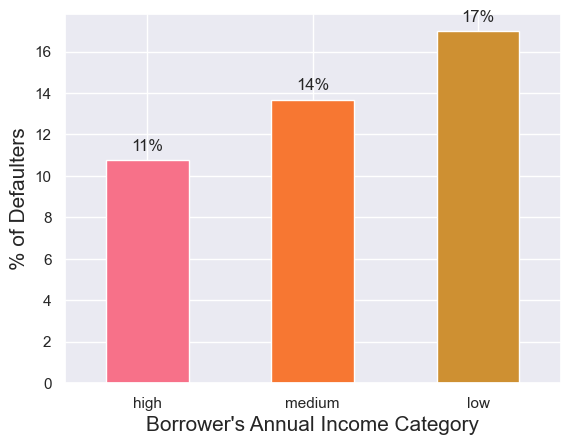

In [103]:
# annual income vs default rate

fig=univariate_defaulters_plot_perc(loan, 'annual_inc_bin')
plt.xlabel("Borrower's Annual Income Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

**Insights:** 1. Borrowers with low annual income(< 50000 USD Per annum) are more likely to default 2. Lower the annual income, higher is the default rate

In [104]:
# binning employment length

def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan['emp_length_bin'] = loan['emp_length'].apply(lambda x: emp_length(int(x)))

#Check the value count under each category
loan['emp_length_bin'].value_counts()

emp_length_bin
expert     10384
senior      9960
fresher     8382
junior      7925
Name: count, dtype: int64

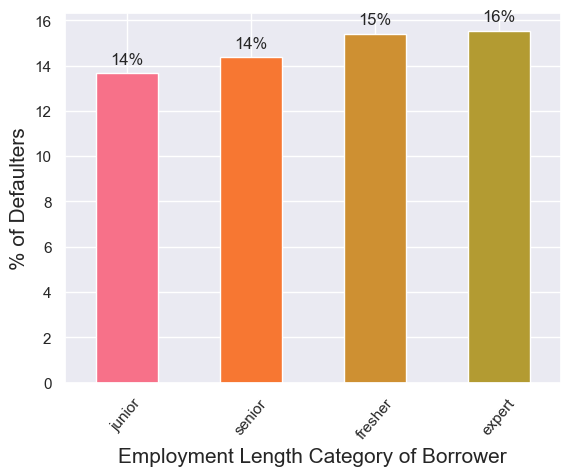

In [105]:
# highest for expert & then fresher , but not much difference.
# Doesn't seem to provide much info about impact on default rate.
fig=univariate_defaulters_plot_perc(loan, 'emp_length_bin')
plt.xlabel("Employment Length Category of Borrower",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.xticks(rotation=50)

plt.show(fig)

### Type Driven Metrics : income_to_loan_amount

**Ratio Variable :** Define a new cloumn loan_income_ratio which defines ratio of annual income to the loan amount of the borrower

In [106]:
# Derive income_to_loan_amount variable as the ratio  of annual income and loan amount

loan['income_to_loan_amount'] = round(loan['annual_inc'] / loan['loan_amnt'])

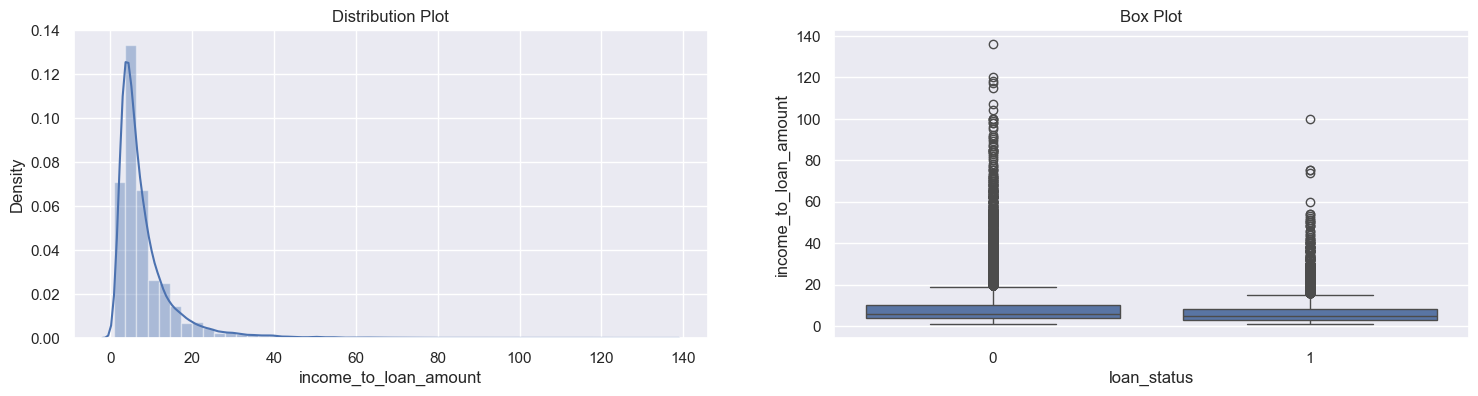

In [107]:
# Plot the variable distribution

univariate_cont_var_plot(loan, 'income_to_loan_amount')

In [108]:
# Summary Metrics
loan.groupby('loan_status')['income_to_loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"31,233.00",8.62,8.16,1.00,4.00,6.00,10.00,136.00
1,"5,418.00",7.15,6.74,1.00,3.00,5.00,8.00,100.00


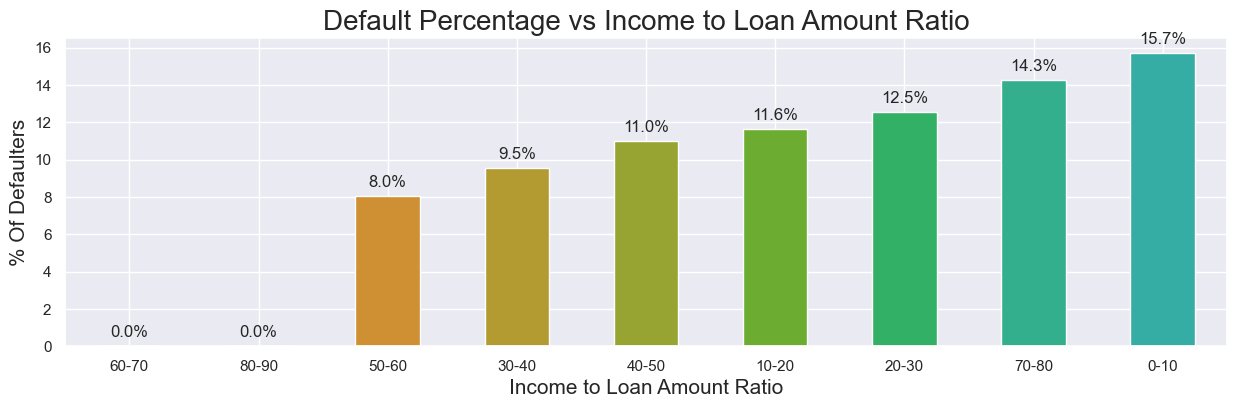

In [109]:
# Plot % of Defaulters

bins = [x for x in range(0, 91, 10)]
labels=[str(x)+'-'+str(x+10) for x in range (0, 90, 10)]

fig=univariate_cont_var_plot_bins('income_to_loan_amount',bins,labels)
plt.xlabel("Income to Loan Amount Ratio",fontsize='15')
plt.ylabel("% Of Defaulters",fontsize='15')
plt.title("Default Percentage vs Income to Loan Amount Ratio",fontsize='20')
plt.show(fig)

### Business Driven Metrics : loan_status

**Business Driven Variable :** Already Defined a new cloumn loan_status which defines the main objective of business whether a borrower will be defaulter or not

#### Driver Variables

As per our univariate analysis, these below variables are looking interesting for bivariate analysis

* Loan Amount (loan_amnt)
* Purpose (purpose)
* Home Ownership (home_ownership)
* Issue Date (issue_d)
* Sub-Grade (sub_grade)
* Term (term)
* Annual Income (annual_inc)
* DTI (dti)
* Public Record Bankruptcies (pub_rec_bankruptcies)
* Employment Length (emp_length)

## 4.3 Bivariate Analysis

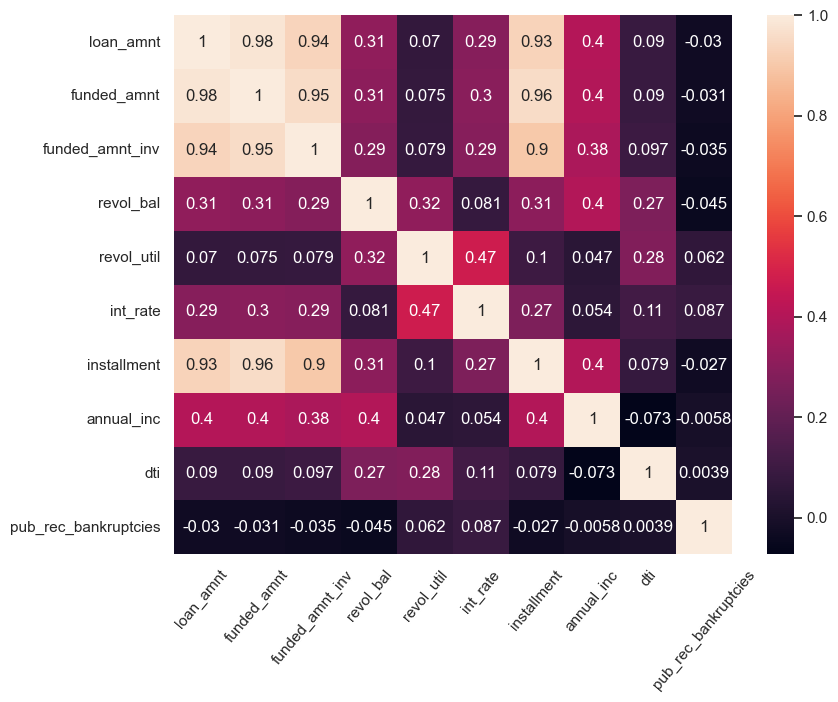

In [110]:
# Correlation Matrix

Columns = ['loan_amnt','funded_amnt','funded_amnt_inv','revol_bal','revol_util',
              'int_rate','installment','annual_inc','dti','pub_rec_bankruptcies']

correlation = loan[Columns].corr()

f,ax = plt.subplots(figsize= (9,7))

sns.heatmap(correlation,xticklabels = correlation.columns.values,yticklabels= correlation.columns.values,
            annot = True)
plt.xticks(rotation=50)
plt.show()

**Insights:**

1. As the correlation between funded_amnt and funded_amnt_inv is not equal to 1 which signifies that Investor may charges small sum of money for as Loan Processing Fee
2. Loan Amount and Funded Amount correlation are not Equal to 1 means actual amount applied by borrower and amount lent to them are not same.

In [111]:
# Function for plotting bivariate Analysis using categorical and numerical variables

def bivariate_cont_var_plot(df,col_x,col_y,hue = 'loan_status'):
    sns.barplot(x=col_x, y=col_y, hue = hue, data=df, ci=None,palette=sns.color_palette('Set2', 16))

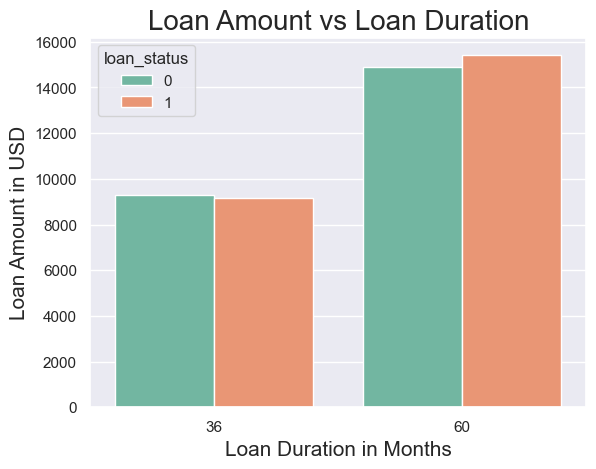

In [112]:
# Plot loan_amt and term on IsDefault

fig=bivariate_cont_var_plot(loan, 'term', 'loan_amnt')
plt.xlabel("Loan Duration in Months",fontsize='15')
plt.ylabel("Loan Amount in USD",fontsize='15')
plt.title("Loan Amount vs Loan Duration",fontsize='20')
plt.show(fig)

**Insights:** 1. Loan takers prefer longer term for large loan amount. 2. The assumption made in univariate analysis is now clear. Higher loan amount with longer terms has more defaulters.

### Bivariate Analysis on Loan Amount and Employment Length over loan_status

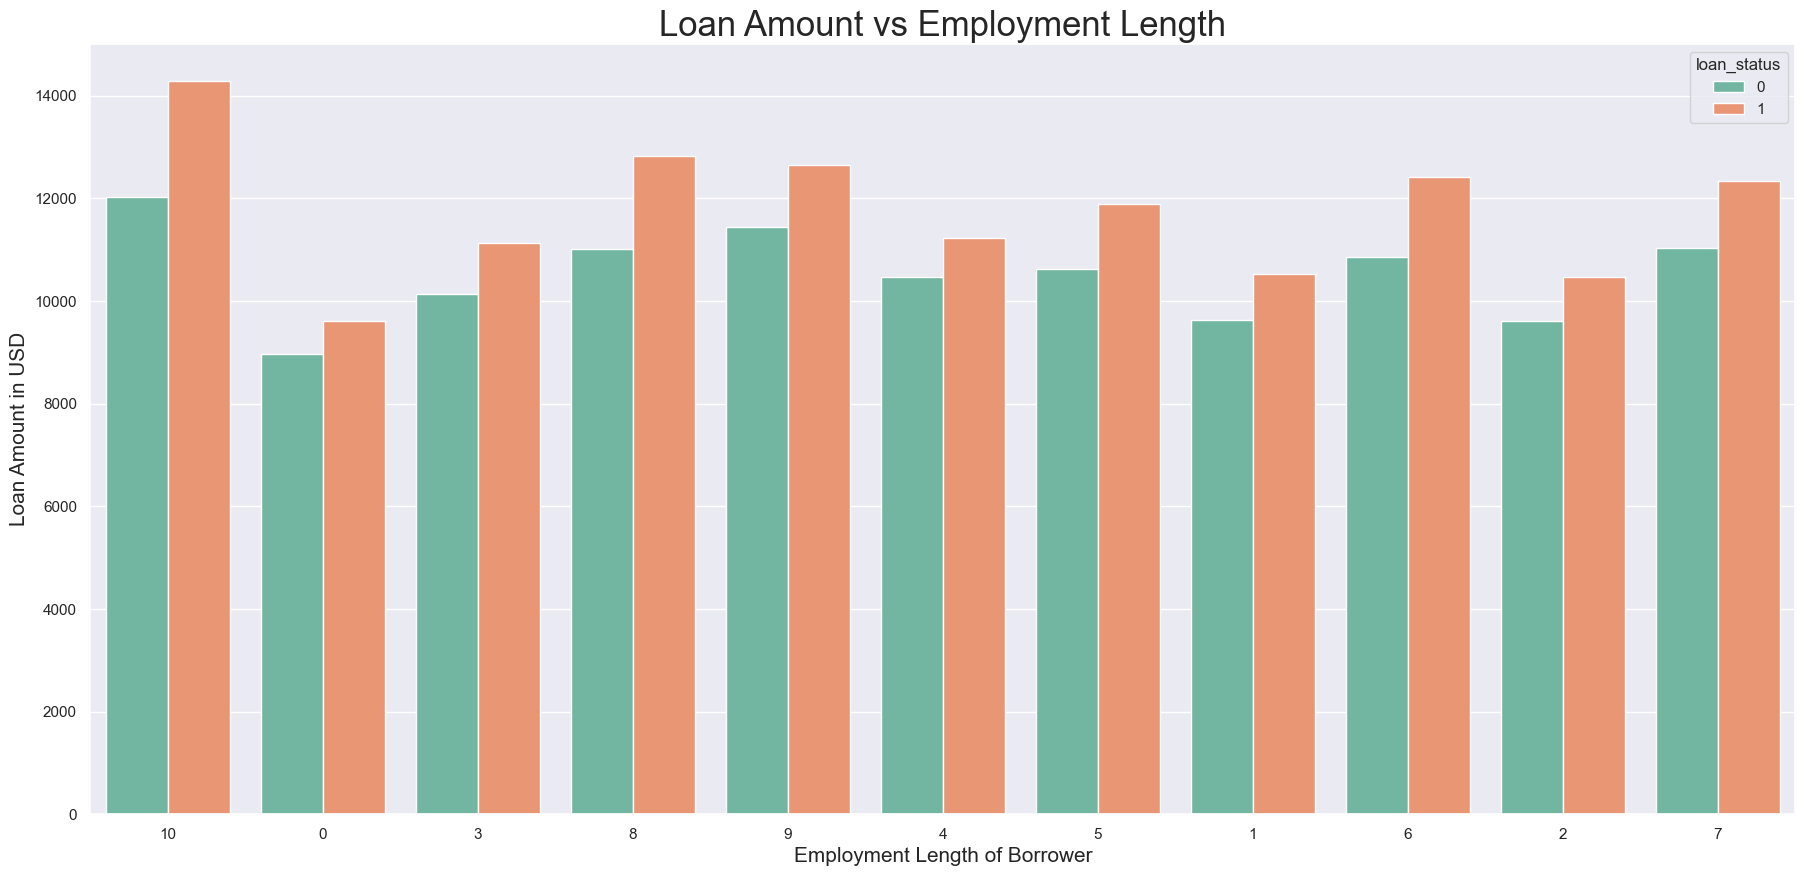

In [113]:
# Plot loan_amt and emp_length over IsDefault
plt.figure(figsize=(22,10))
fig=bivariate_cont_var_plot(loan, 'emp_length', 'loan_amnt')
plt.xlabel("Employment Length of Borrower",fontsize='15')
plt.ylabel("Loan Amount in USD",fontsize='15')
plt.title("Loan Amount vs Employment Length",fontsize='25')
plt.show(fig)

**Insights:** 1. Large loan amounts are taken by borrowers with more than 10 years of employment length. 2. Higher loan amount with more than 10 years of employment length has more defaulters.

# Top 5 Driving Factors
# Top 5 driven factors to consider for loan defaulters identification:

1 Purpose of Loan

2 Annual Income

3 dti

4 grade

5 Interest Rate

# Segmented Univariate Analysis

**To further conclude on driver variables , analysing the data for most popular loan purpose**

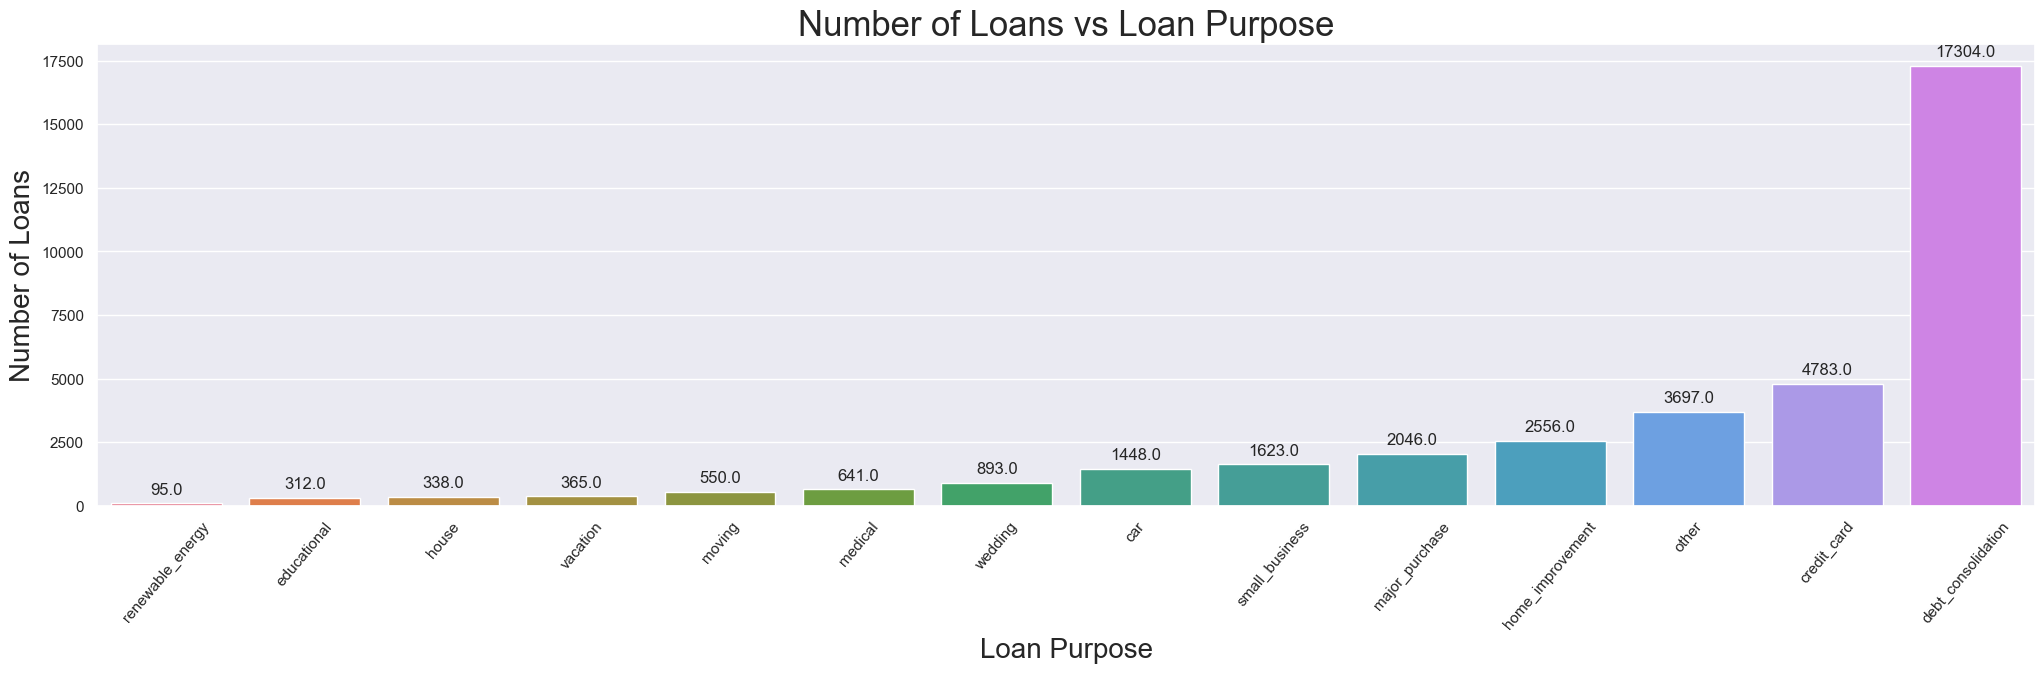

In [114]:
# Frequency distribution of loan purpose
plt.figure(figsize=(25, 6))
fig=univariate_categorical_var_plot(loan, 'purpose')
plt.xlabel("Loan Purpose",fontsize='20')
plt.ylabel("Number of Loans",fontsize='20')
plt.title("Number of Loans vs Loan Purpose",fontsize='25')
plt.xticks(rotation=50)
plt.show(fig)

### From the Above frequency distribution plot we can see the most popular loan purpose among borrowers are :
- Debt_consolidation
- Credit_card
- Home_improvement
- Major_purchase
- Small_business 

In [115]:
# Filtering records for above top-5 loan purpose from loan dataframe
top_5_purposes = ["debt_consolidation","credit_card","home_improvement","major_purchase","small_business"]
loan_top_5_purposes = loan[loan['purpose'].isin(top_5_purposes)]
loan_top_5_purposes['purpose'].value_counts()

purpose
debt_consolidation    17304
credit_card            4783
home_improvement       2556
major_purchase         2046
small_business         1623
Name: count, dtype: int64

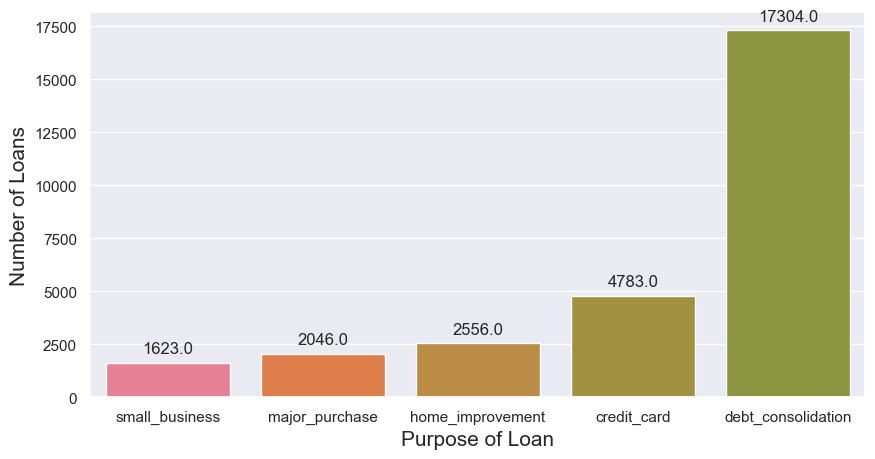

In [116]:
# Frquency distribution plot for top-5 loan purpose

plt.figure(figsize=(10, 5))
univariate_categorical_var_plot(loan_top_5_purposes, 'purpose')
plt.xlabel("Purpose of Loan",fontsize='15')
plt.ylabel("Number of Loans",fontsize='15')
plt.show(fig)

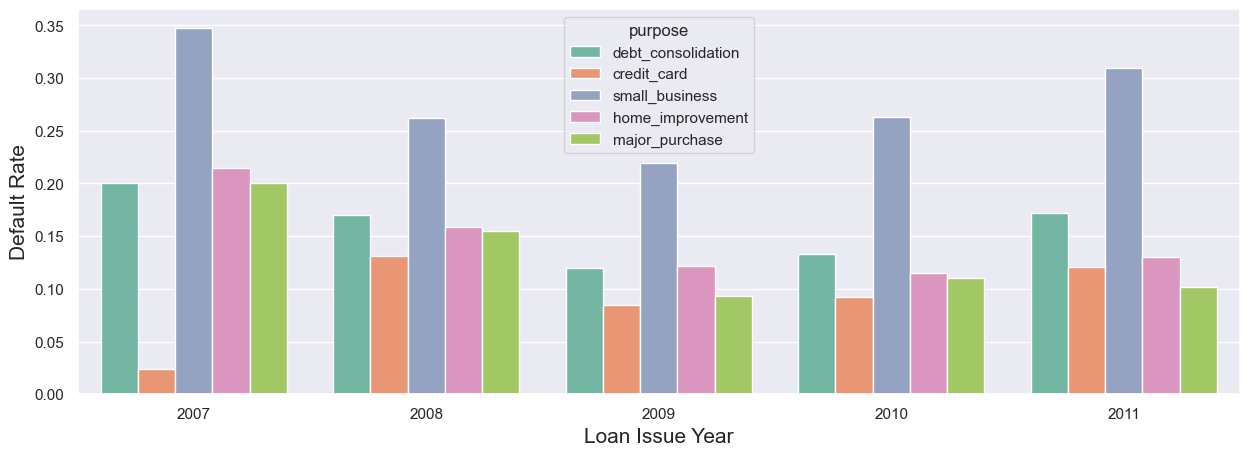

In [117]:
# comparing default rates across issue_year for top-5 loan purpose

plt.figure(figsize=(15, 5))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'issue_year','loan_status',hue = 'purpose')
plt.xlabel("Loan Issue Year",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

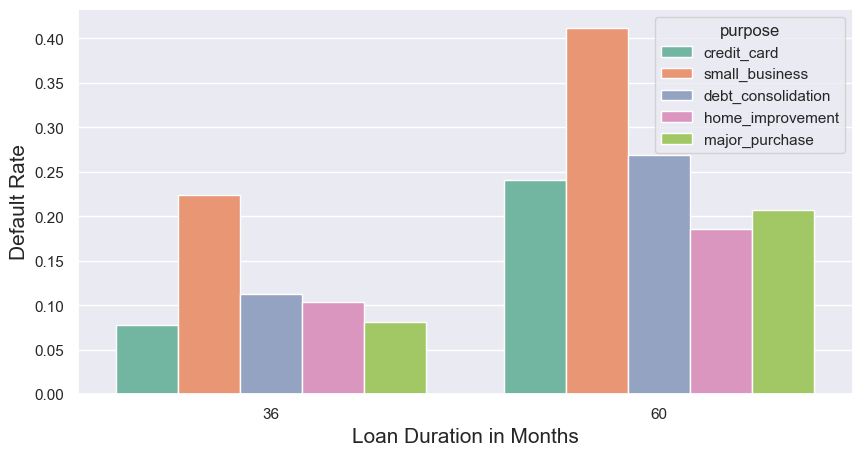

In [118]:
# comparing default rates across term for top-5 loan purpose

plt.figure(figsize=(10, 5))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'term','loan_status',hue = 'purpose')
plt.xlabel("Loan Duration in Months",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

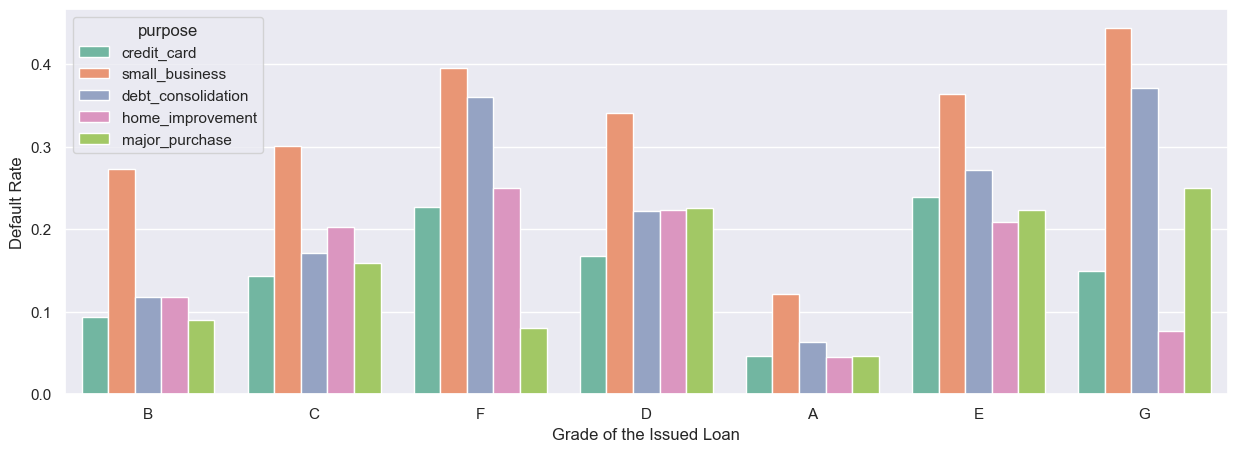

In [119]:
# comparing default rates across grade for top-5 loan purpose

plt.figure(figsize=(15, 5))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'grade','loan_status',hue = 'purpose')
plt.xlabel("Grade of the Issued Loan")
plt.ylabel("Default Rate")
plt.show(fig)

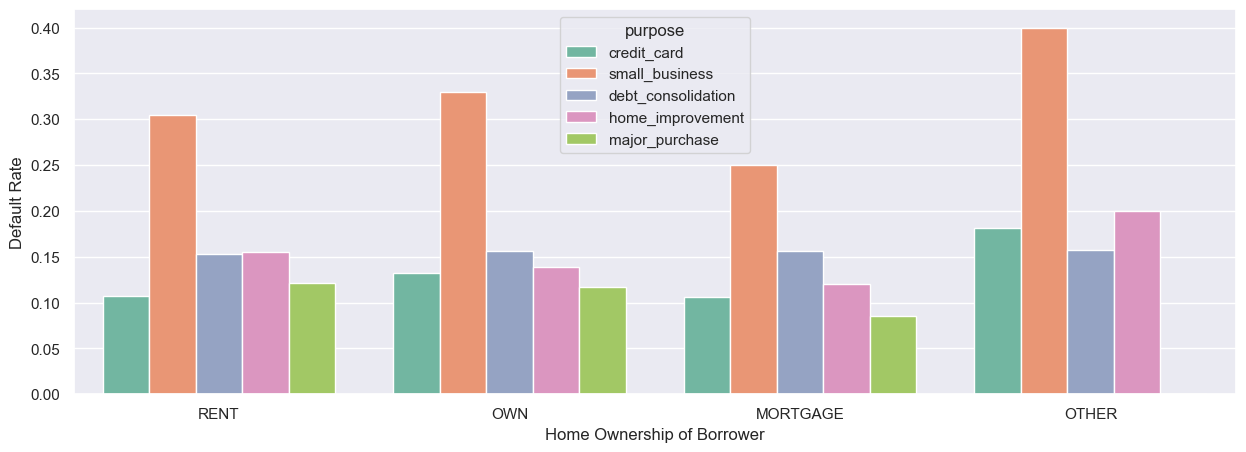

In [120]:
# comparing default rates across home_ownership for top-5 loan purpose

plt.figure(figsize=(15, 5))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'home_ownership','loan_status',hue = 'purpose')
plt.xlabel("Home Ownership of Borrower")
plt.ylabel("Default Rate")
plt.show(fig)

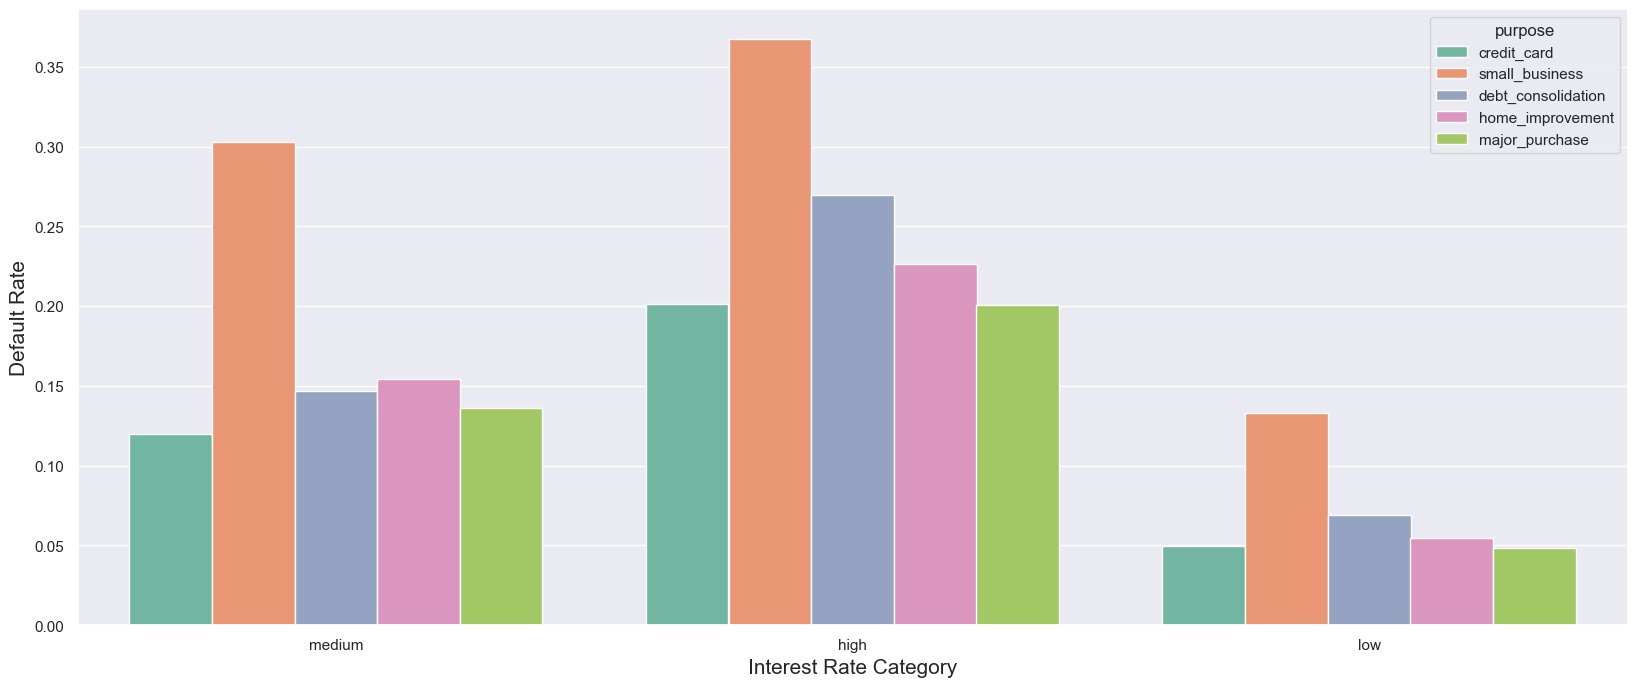

In [121]:
# comparing default rates across int_rate_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'int_rate_bin','loan_status',hue = 'purpose')
plt.xlabel("Interest Rate Category",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

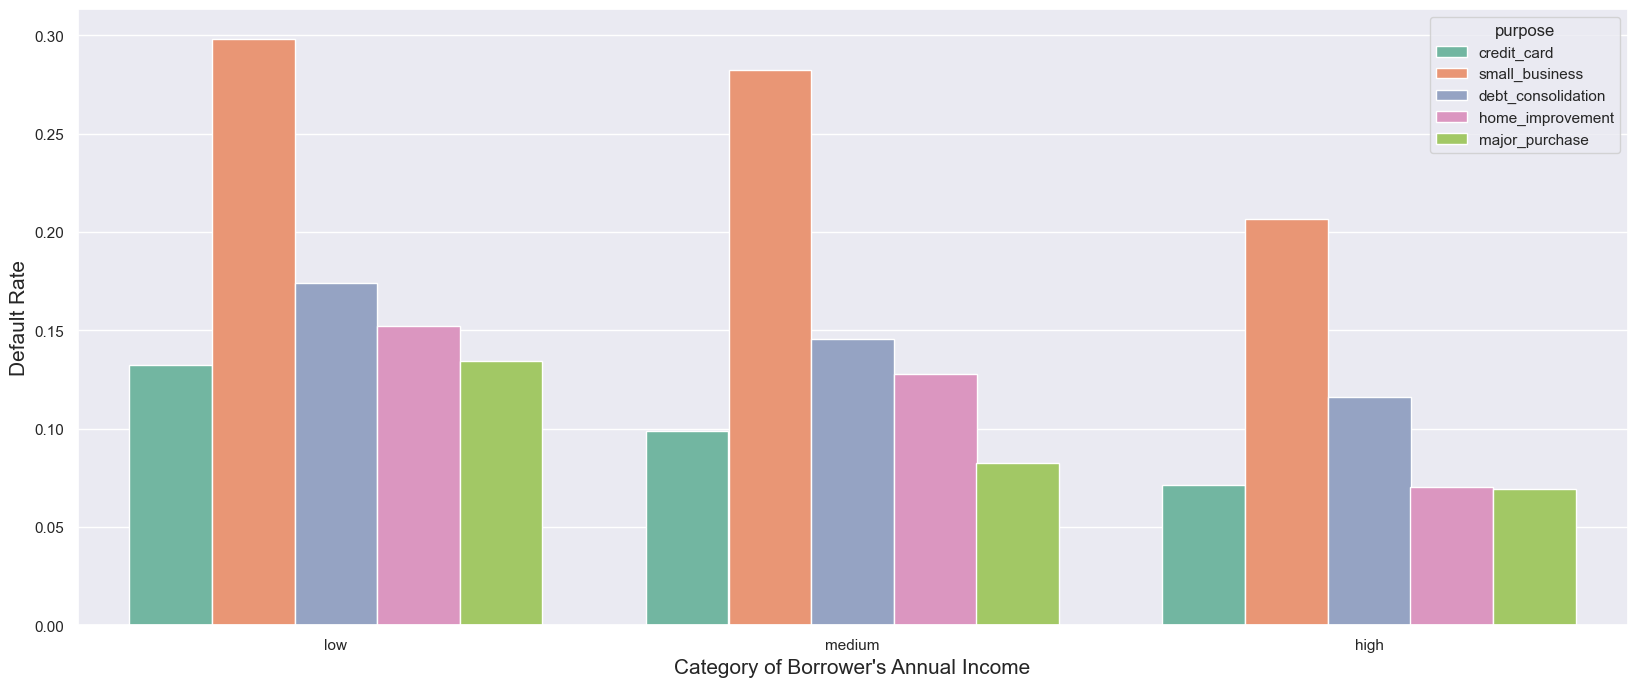

In [122]:
# comparing default rates across annual_inc_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
bivariate_cont_var_plot(loan_top_5_purposes,'annual_inc_bin','loan_status',hue = 'purpose')
plt.xlabel("Category of Borrower's Annual Income",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

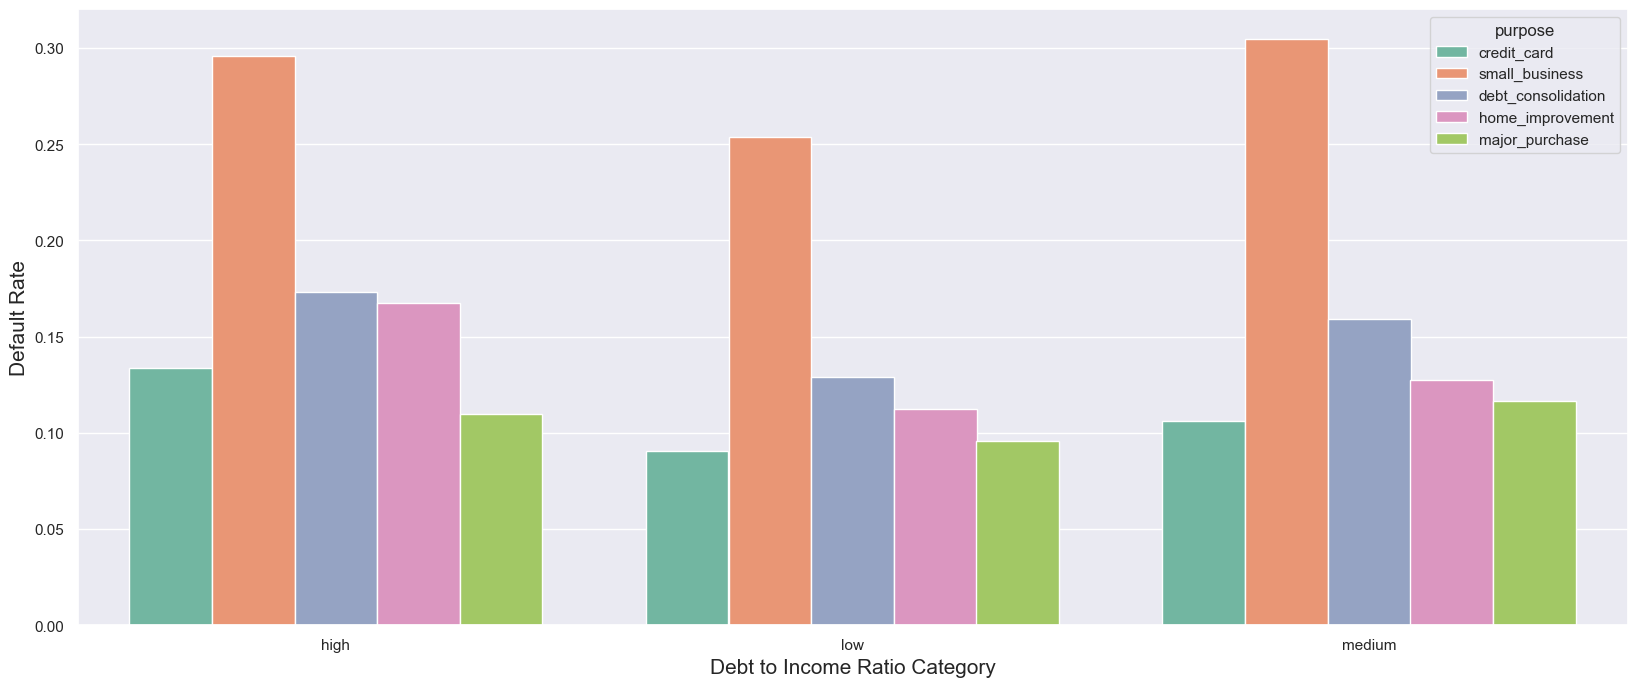

In [123]:
# comparing default rates across dti_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
bivariate_cont_var_plot(loan_top_5_purposes,'dti_bin','loan_status',hue = 'purpose')
plt.xlabel("Debt to Income Ratio Category",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

In [124]:
#Creating list of top 5 purpose
top_5_purposes = ["debt_consolidation","credit_card","home_improvement","major_purchase","small_business"]

# Converting 'term' to string type for calculating the difference between highest & lowest values.
loan_top_5_purposes['term']=loan_top_5_purposes['term'].apply(lambda x : str(x)+"mon")

In [125]:
# Creating 5 dataframes for top_5_purposes
for p in top_5_purposes :
    globals()[p]=loan_top_5_purposes[loan_top_5_purposes['purpose']== p]

In [126]:
# Excluding sub_grade as its impact on target variable is same as grade
# Considering all the important driver  categorical variables except sub-grade
# since funded_amnt , funded_amnt_inv & loan_amnt are strongly positively correlated,hence considering only loan_amount among these 3 similar type of variables
cols=['grade','term',  'emp_length', 'home_ownership','verification_status','loan_amnt_bin', 
      'int_rate_bin', 'dti_bin', 'installment_bin', 
      'annual_inc_bin','emp_length_bin']

In [127]:
# calculating the distance between the highest and lowest mean values for all the categorical vars except sub_grade

def difference_high_minus_low(df,col):
    default_rate = df.groupby(col).loan_status.mean().sort_values(ascending=False)
    return (round(default_rate[0] - default_rate[-1], 2))

In [128]:
# calculating the distance between the highest and lowest mean values for all the categorical vars except sub_grade
# Storing the result in sorted dictionary
def create_dict(df) :
    d = { k: difference_high_minus_low(df,k)*100 for k in cols }
    sorted_d = dict(sorted(d.items(), key=lambda x: x[1],reverse=True))
    return(sorted_d)

### For loan purpose - Debt Consolidation : Impact of Driver variables on Default Rate

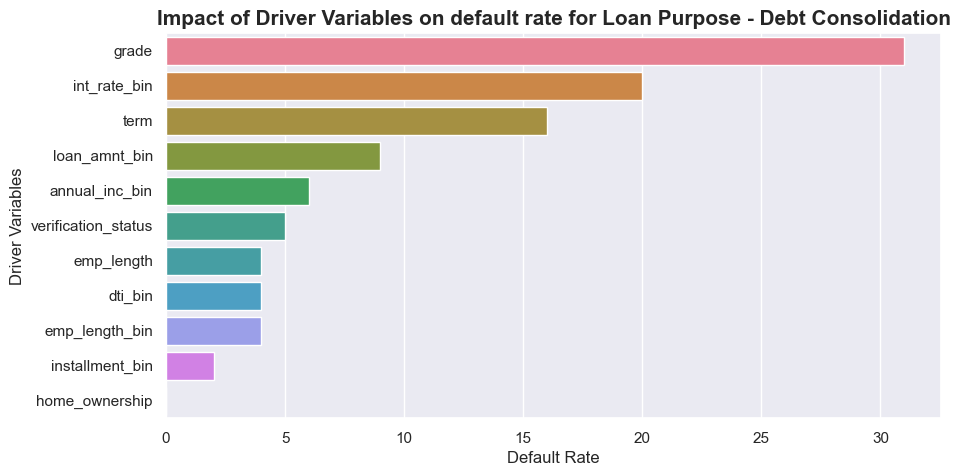

In [129]:
#Looking top-5 driver vars for loan_purpose : debt_consolidation

plt.figure(figsize=(10,5))
color_palette = sns.color_palette("husl", 11)
fig = sns.barplot(x=list(create_dict(debt_consolidation).values()), y=list(create_dict(debt_consolidation).keys()),palette=color_palette)
plt.xlabel("Default Rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose - Debt Consolidation",fontsize='15', weight='bold')
plt.show(fig)

### For loan purpose - Credit Card Due Amount Payment : Impact of Driver variables on Default Rate

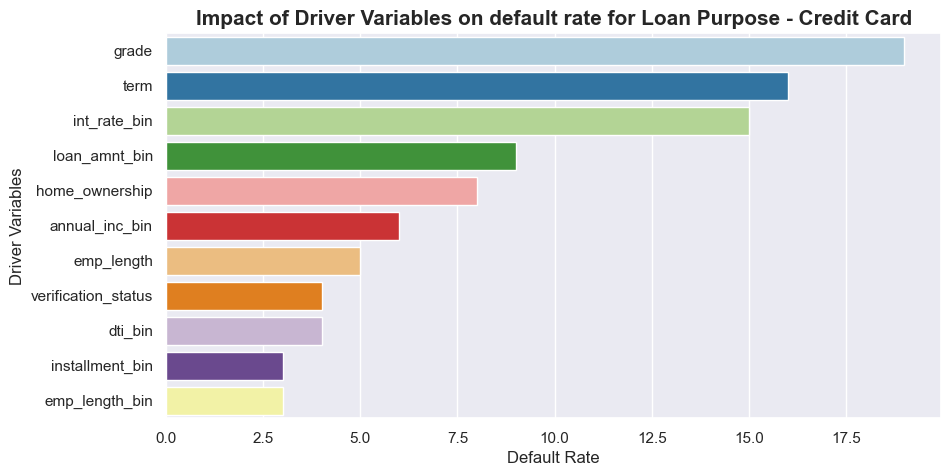

In [130]:
#Looking top-5 driver vars for loan_purpose : credit_card
plt.figure(figsize=(10,5))
color_palette = sns.color_palette("Paired", 11)
fig = sns.barplot(x=list(create_dict(credit_card).values()), y=list(create_dict(credit_card).keys()),palette=color_palette)
plt.xlabel("Default Rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose - Credit Card",fontsize='15', weight='bold')
plt.show(fig)

### For loan purpose - Home Improvement : Impact of Driver variables on Default Rate

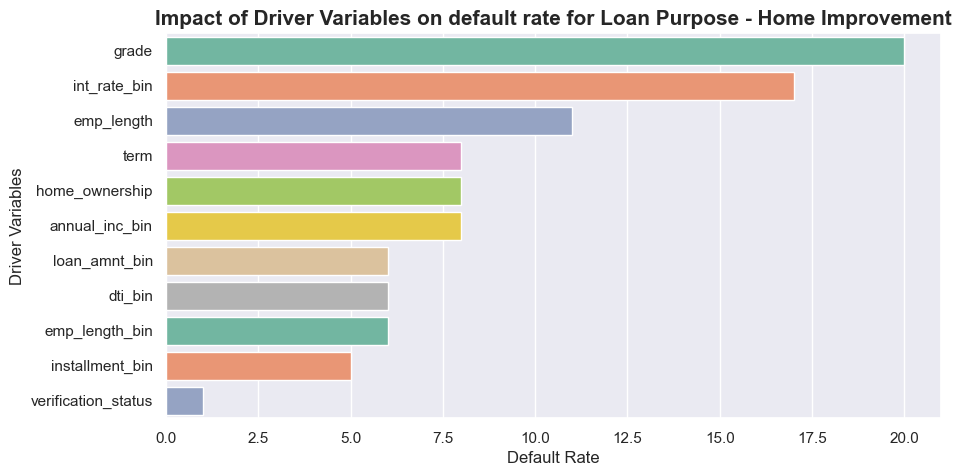

In [131]:
#Looking top-5 driver vars for loan_purpose : home_improvement
plt.figure(figsize=(10, 5))
color_palette = sns.color_palette("Set2", 11)
fig = sns.barplot(x=list(create_dict(home_improvement).values()), y=list(create_dict(home_improvement).keys()),palette=color_palette)
plt.xlabel("Default Rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose - Home Improvement",fontsize='15', weight='bold')
plt.show(fig)

### For loan purpose - Major Purchase : Impact of Driver variables on Default Rate

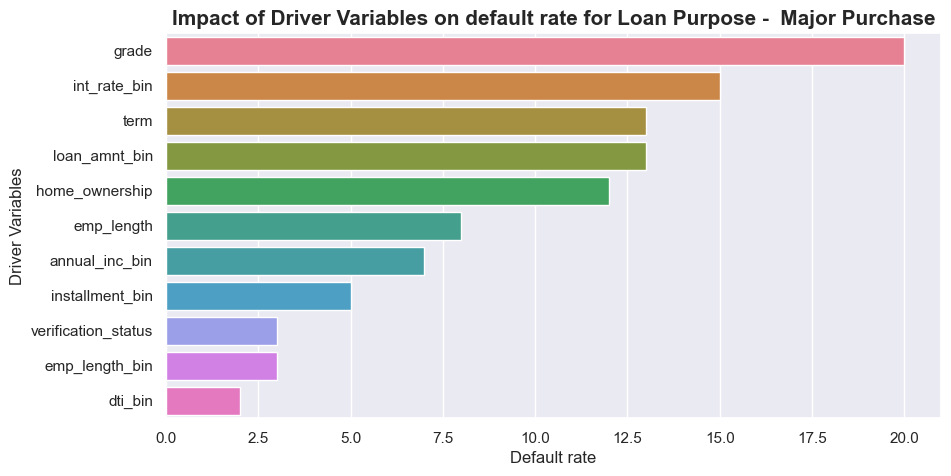

In [132]:
#Looking top-5 driver vars for loan_purpose : major_purchase
plt.figure(figsize=(10,5))
color_palette = sns.color_palette("husl", 11)
fig = sns.barplot(x=list(create_dict(major_purchase).values()), y=list(create_dict(major_purchase).keys()),palette=color_palette)
plt.xlabel("Default rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose -  Major Purchase",fontsize='15', weight='bold')
plt.show(fig)

### Driver variables level of Impact on Default Rate when loan purpose is for Small Business

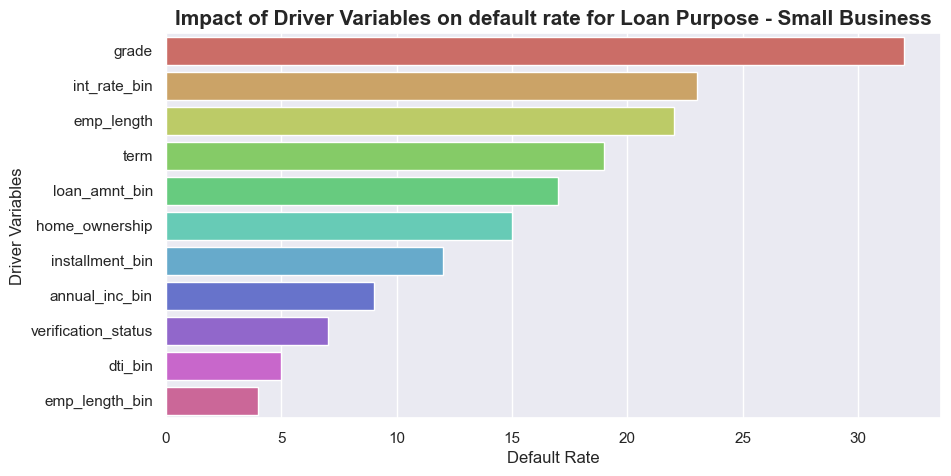

In [133]:
#Looking top-5 driver vars for loan_purpose : small_business
plt.figure(figsize=(10,5))
color_palette = sns.color_palette("hls", 11)
fig = sns.barplot(x=list(create_dict(small_business).values()), y=list(create_dict(small_business).keys()),palette=color_palette)
plt.xlabel("Default Rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose - Small Business",fontsize='15', weight='bold')
plt.show(fig)

# **Thank You !!!!**